<a href="https://colab.research.google.com/github/TanyashaVoron/stock_market_analysis/blob/main/all_algoritm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Общий вывод данных - график + таблица

In [ ]:
def print_data(name, alp_data_plot, alp_data_table):
  print_plot(alp_data_plot, name)
  print_table(alp_data_table)

## Построение графиков



In [ ]:
import matplotlib.pyplot as plt

def print_plot(alp_data, name):
    plt.figure(figsize=(15, 5))  # Установка размера графика (ширина, высота)

    for label, data in alp_data.items():
        plt.plot(data, label=label, marker='o')

        # Подписываем значения в точках
        # for i, value in enumerate(data):
            # plt.text(i, value, f'{value:.2f}', fontsize=9, ha='center', va='bottom')

    # Настройка осей
    plt.xticks(ticks=range(len(data)))  # Отметки по оси X от 0 до n
    plt.yticks()  # Отметри на оси У


    plt.legend(
        bbox_to_anchor=(1.05, 1),  # Положение легенды: справа от графика
        loc='upper left',          # Выравнивание легенды относительно bbox_to_anchor
        borderaxespad=0.           # Расстояние между легендой и графиком
    )

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Оставляем место для легенды справа


    # Добавление легенды и отображение графика
    plt.legend()
    plt.title(name)  # Заголовок графика
    plt.grid()  # Добавление сетки
    plt.show()

## Построение таблиц

In [ ]:
import pandas as pd
from tabulate import tabulate

def print_table(data_dict):
    for key in data_dict:
        data_dict[key] = [round(num, 3) for num in data_dict[key]]

    # Определяем максимальную длину массивов
    max_length = max(len(values) for values in data_dict.values())

    # Создаем новый словарь с дополненными массивами
    padded_data = {key: values + [None] * (max_length - len(values)) for key, values in data_dict.items()}

    # Создаем DataFrame из дополненного словаря
    df = pd.DataFrame(padded_data)

    # Добавляем нумерацию строк
    df.index.name = 'Номер строки'

    # Выводим таблицу
    print(tabulate(df, headers='keys', tablefmt='pretty'))

## Процент от основного датасета

In [ ]:
def prosent(main_data, new_data):
  max_len_data = max(len(main_data), len(new_data))
  return [
        round(((main_data[i] / new_data[i] - 1) * 100), 2) if new_data[i] != 0 else None
        for i in range(max_len_data)
    ]

# Запрос на датасет

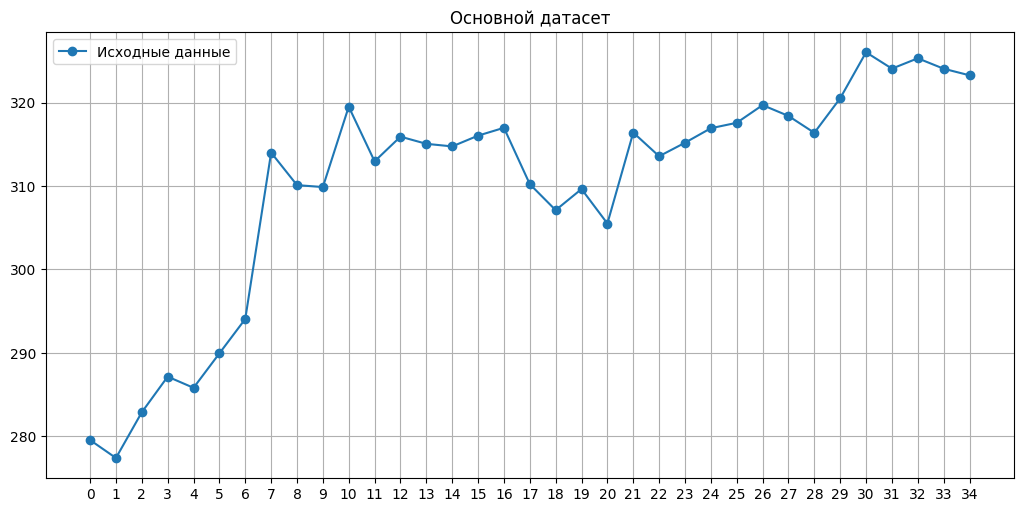

+--------------+-----------------+
| Номер строки | Исходные данные |
+--------------+-----------------+
|      0       |     279.55      |
|      1       |      277.4      |
|      2       |     282.88      |
|      3       |     287.15      |
|      4       |     285.81      |
|      5       |     289.94      |
|      6       |     294.06      |
|      7       |      314.0      |
|      8       |      310.1      |
|      9       |     309.87      |
|      10      |      319.5      |
|      11      |     312.95      |
|      12      |     315.91      |
|      13      |     315.05      |
|      14      |     314.74      |
|      15      |     316.03      |
|      16      |     316.97      |
|      17      |     310.22      |
|      18      |      307.1      |
|      19      |     309.63      |
|      20      |      305.5      |
|      21      |      316.4      |
|      22      |     313.56      |
|      23      |     315.18      |
|      24      |     316.92      |
|      25      |    

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta
from tabulate import tabulate

# Определяем параметры
ticker = "SBER"
days = 50  # Количество дней

# URL для запроса данных через API MOEX ISS
url = f'https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/TQBR/securities/{ticker}.json'

# Вычисляем даты
end_date = datetime.today().strftime("%Y-%m-%d")
start_date = (datetime.today() - timedelta(days=days)).strftime("%Y-%m-%d")

# Параметры запроса
params = {
    "from": start_date,
    "till": end_date,
    "start": 0
}

# Отправляем GET-запрос
response = requests.get(url, params=params)

# Проверяем успешность запроса
if response.status_code == 200:
    data = response.json()
else:
    print("Ошибка запроса:", response.status_code)
    print(response.text)
    exit()

# Проверяем наличие данных
if "history" not in data or "data" not in data["history"] or not data["history"]["data"]:
    print("Нет актуальных данных за указанный период.")
    exit()

# Извлекаем данные
columns = data['history']['columns']
data = data['history']['data']

# Создаём DataFrame
df = pd.DataFrame(data, columns=columns)

# Оставляем только нужные столбцы: дата и цена закрытия
df = df[['TRADEDATE', 'CLOSE']].rename(columns={'TRADEDATE': 'Дата', 'CLOSE': 'Цена'})

# Сортировка DataFrame по дате
df = df.sort_values(by='Дата').reset_index(drop=True)

# Преобразуем цену в числовой тип
df['Цена'] = pd.to_numeric(df['Цена'], errors='coerce')

# Преобразуем дату в формат ДД.ММ.ГГ
df['Дата'] = pd.to_datetime(df['Дата']).dt.strftime('%d.%m.%Y')

data_main = df['Цена']

# Визуализация
data_print_main = {
        "Исходные данные": data_main
      }

print_data('Основной датасет', data_print_main, data_print_main)

# Алгоритмы

### 1. Адаптивные модели

#### 1.1. Экспоненциальное сглаживание (Simple Exponential Smoothing, SES)

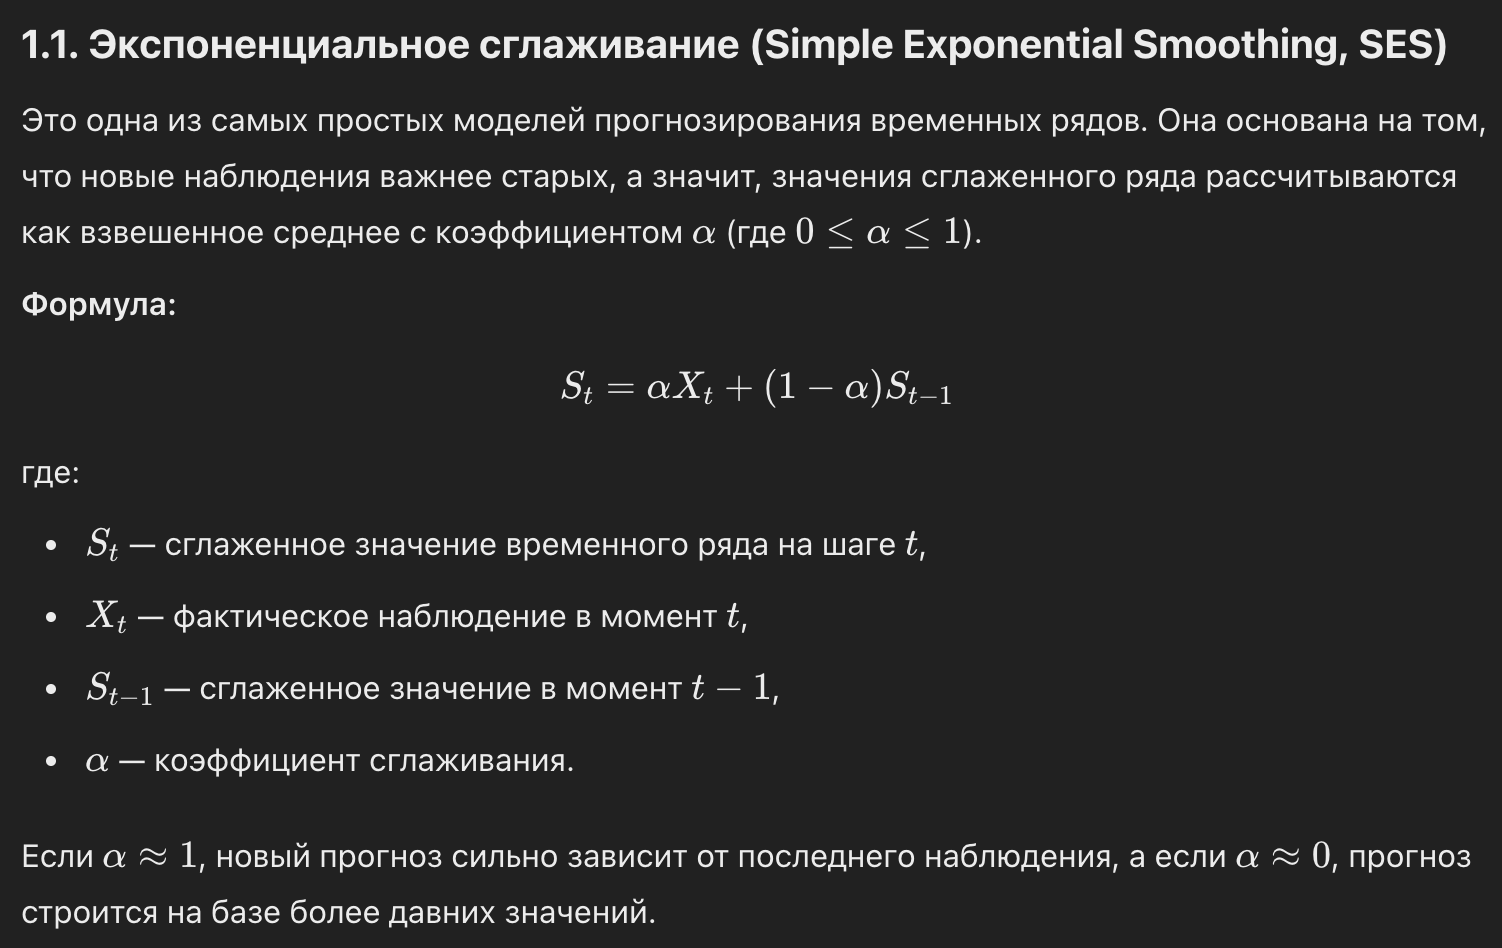

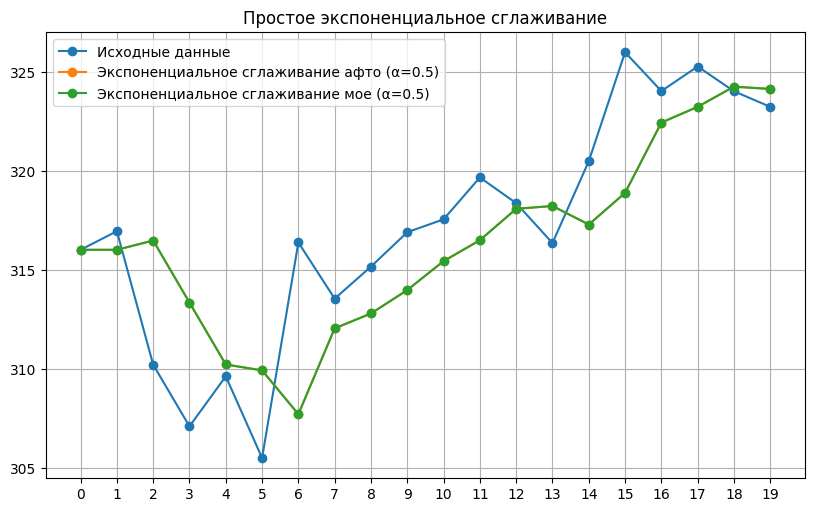

+--------------+-----------------+-------------------------------------------+------------------------------------------+
| Номер строки | Исходные данные | Экспоненциальное сглаживание афто (α=0.5) | Экспоненциальное сглаживание мое (α=0.5) |
+--------------+-----------------+-------------------------------------------+------------------------------------------+
|      0       |     316.03      |                  316.03                   |                  316.03                  |
|      1       |     316.97      |                  316.03                   |                  316.03                  |
|      2       |     310.22      |                   316.5                   |                  316.5                   |
|      3       |      307.1      |                  313.36                   |                  313.36                  |
|      4       |     309.63      |                  310.23                   |                  310.23                  |
|      5       |      30

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

def exponential_smoothing_afto(data, alpha):
  model = SimpleExpSmoothing(data)
  fit = model.fit(smoothing_level=alpha, optimized=False)
  return fit.fittedvalues


def exponential_smoothing_my(data, alpha):
    """
    Простое экспоненциальное сглаживание.

    :param data: Список наблюдений (временной ряд)
    :param alpha: Параметр сглаживания (0 < alpha <= 1)
    :return: Список прогнозов
    """
    # Инициализация первого прогноза
    forecasts = [data[0]]  # Первый прогноз равен первому значению

    # Вычисление прогнозов для остальных точек
    for t in range(1, len(data)):
        forecast = alpha * data[t - 1] + (1 - alpha) * forecasts[-1]
        forecasts.append(forecast)

    return forecasts

# Пример использования
alpha = 0.5 # Задаём коэффициент сглаживания
forecasts_afto = exponential_smoothing_afto(data_main, alpha)
forecasts_my = exponential_smoothing_my(data_main, alpha)

# Визуализация
data_MSE_plot = {
        "Исходные данные": data_main,
        f"Экспоненциальное сглаживание афто (α={alpha})": forecasts_afto,
        f"Экспоненциальное сглаживание мое (α={alpha})": forecasts_my
    }

print_data('Простое экспоненциальное сглаживание', data_MSE_plot, data_MSE_plot)

#### 1.2. Модель Ч. Хольта (Holt’s Linear Trend Model)

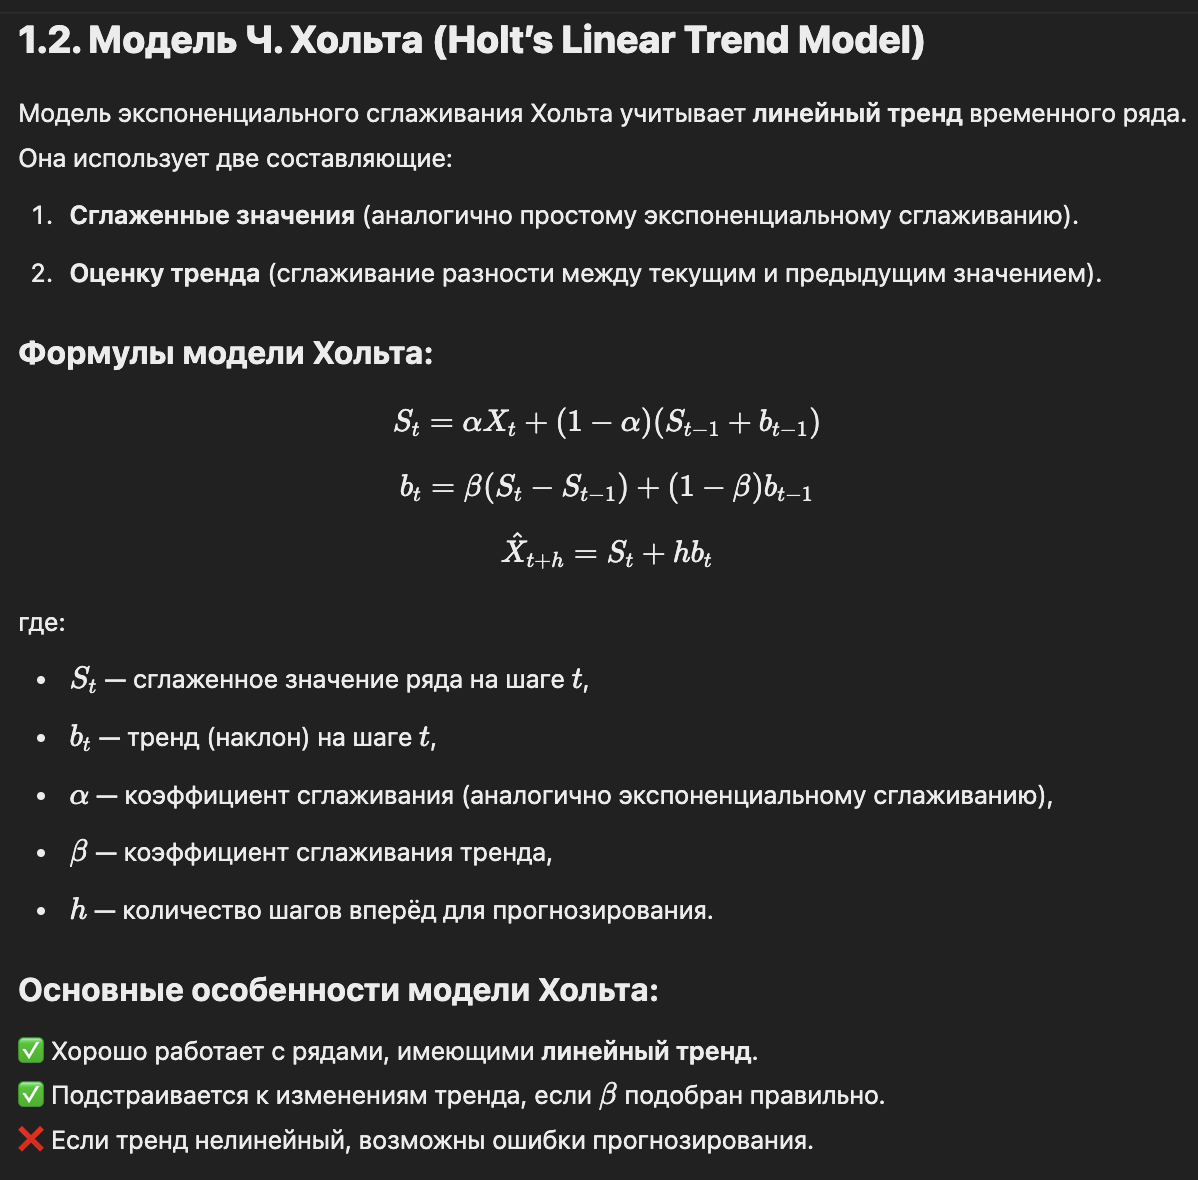

<ipython-input-26-388320343d0d>:8: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)


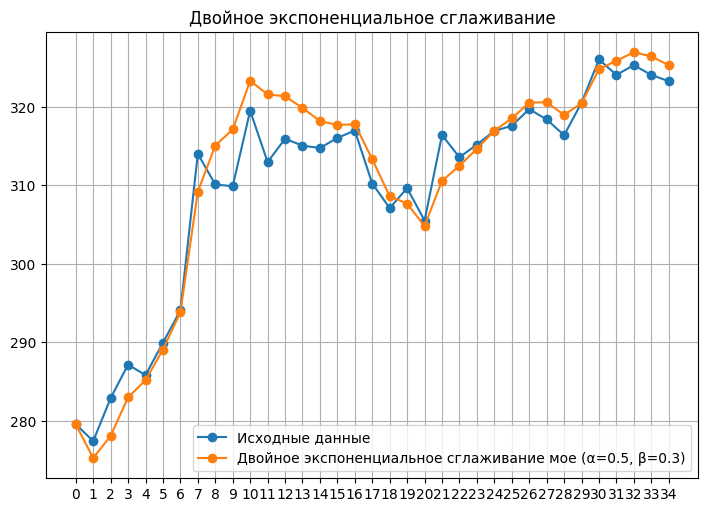

+--------------+-----------------+---------------------------------------------------------+
| Номер строки | Исходные данные | Двойное экспоненциальное сглаживание мое (α=0.5, β=0.3) |
+--------------+-----------------+---------------------------------------------------------+
|      0       |     279.55      |                         279.55                          |
|      1       |      277.4      |                         275.25                          |
|      2       |     282.88      |                         278.059                         |
|      3       |     287.15      |                         282.963                         |
|      4       |     285.81      |                         285.172                         |
|      5       |     289.94      |                         289.056                         |
|      6       |     294.06      |                         293.809                         |
|      7       |      314.0      |                         309.184    

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

def double_exponential_smoothing_afto(data, alpha, beta):
  model = Holt(data)
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
  return fit.fittedvalues

def double_exponential_smoothing_my(data, alpha, beta):
    """
    Двойное экспоненциальное сглаживание (Holt's method).

    :param data: Список наблюдений (временной ряд)
    :param alpha: Параметр сглаживания уровня (0 < alpha <= 1)
    :param beta: Параметр сглаживания тренда (0 < beta <= 1)
    :return: Список прогнозов
    """
    # Инициализация начальных значений
    l = [data[0]]  # Уровень
    b = [data[1] - data[0]]  # Тренд
    forecasts = [data[0]]  # Первый прогноз равен первому значению

    # Вычисление прогнозов для остальных точек
    for t in range(1, len(data)):
        # Обновление уровня
        l_new = alpha * data[t] + (1 - alpha) * (l[-1] + b[-1])
        l.append(l_new)

        # Обновление тренда
        b_new = beta * (l[-1] - l[-2]) + (1 - beta) * b[-1]
        b.append(b_new)

        # Прогноз на следующий шаг
        forecast = l[-1] + b[-1]
        forecasts.append(forecast)

    return forecasts

# Пример использования
alpha = 0.5 # Параметр сглаживания уровня
beta = 0.3 # Параметр сглаживания тренда
forecasts_afto = double_exponential_smoothing_afto(data_main, alpha, beta)
forecasts_my = double_exponential_smoothing_my(data_main, alpha, beta)

# Визуализация
data_double_exponential_smoothing_plot = {
        "Исходные данные": data_main,
        f"Двойное экспоненциальное сглаживание мое (α={alpha}, β={beta})": forecasts_my
    }
#f"Двойное экспоненциальное сглаживание афто (α={alpha}, β={beta})": forecasts_afto,
print_data('Двойное экспоненциальное сглаживание', data_double_exponential_smoothing_plot, data_double_exponential_smoothing_plot)

#### 1.3. Однопараметрическая модель Р. Брауна (Brown’s One-Parameter Model)

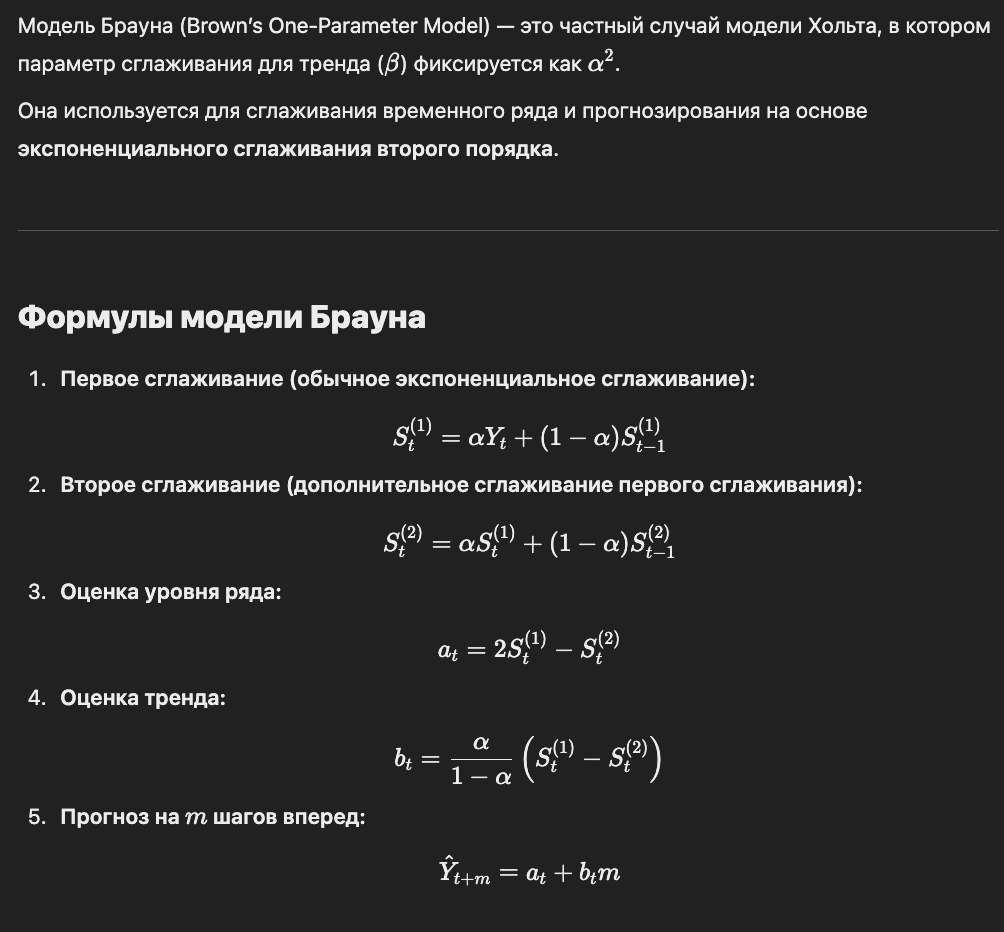

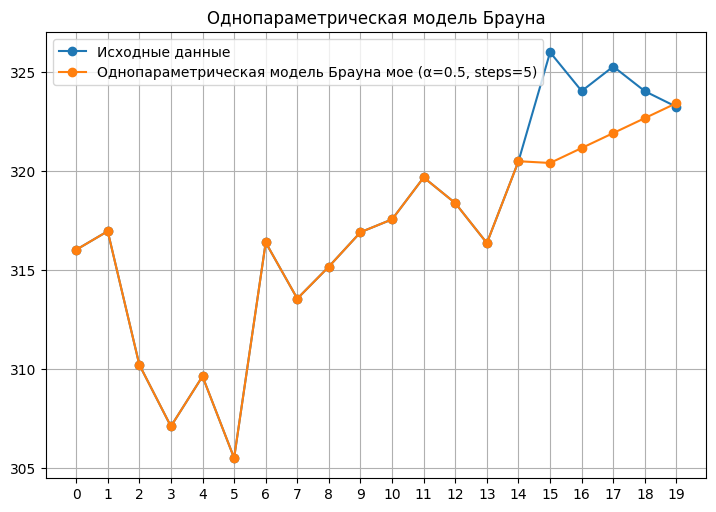

+--------------+-----------------+--------------------------------------------------------+
| Номер строки | Исходные данные | Однопараметрическая модель Брауна мое (α=0.5, steps=5) |
+--------------+-----------------+--------------------------------------------------------+
|      0       |     316.03      |                         316.03                         |
|      1       |     316.97      |                         316.97                         |
|      2       |     310.22      |                         310.22                         |
|      3       |      307.1      |                         307.1                          |
|      4       |     309.63      |                         309.63                         |
|      5       |      305.5      |                         305.5                          |
|      6       |      316.4      |                         316.4                          |
|      7       |     313.56      |                         313.56               

In [ ]:
import numpy as np
import pandas as pd

def brown_exponential_smoothing_my(series, alpha, forecast_steps=1):
    """
    Однопараметрическая модель Брауна.

    :param series: Временной ряд (pandas.Series)
    :param alpha: Коэффициент сглаживания (0 < alpha < 1)
    :param forecast_steps: Количество шагов прогнозирования
    :return: Прогнозные значения
    """
    n = len(series)

    # Первое и второе сглаживание
    S1 = np.zeros(n)
    S2 = np.zeros(n)

    # Начальные значения (инициализируем первыми двумя значениями ряда)
    S1[0] = series.iloc[0]
    S2[0] = series.iloc[0]

    # Расчёт первого и второго сглаживания
    for t in range(1, n):
        S1[t] = alpha * series.iloc[t] + (1 - alpha) * S1[t-1]
        S2[t] = alpha * S1[t] + (1 - alpha) * S2[t-1]

    # Оценка уровня и тренда
    a_t = 2 * S1 - S2
    b_t = (alpha / (1 - alpha)) * (S1 - S2)

    # Прогноз на forecast_steps шагов вперёд
    forecasts = a_t[-1] + b_t[-1] * np.arange(1, forecast_steps + 1)

    return forecasts

# Пример использования
alpha = 0.5 # Параметр сглаживания уровня
forecast_steps = 5 # Прогноз на 3 шага вперед
forecasts_my = brown_exponential_smoothing_my(data_main[:-forecast_steps], alpha, forecast_steps)

# Визуализация
data_brown_exponential_smoothing_plot = {
        "Исходные данные": data_main,
        f"Однопараметрическая модель Брауна мое (α={alpha}, steps={forecast_steps})": list(data_main[:-forecast_steps])+ list(forecasts_my)
    }

print_data('Однопараметрическая модель Брауна', data_brown_exponential_smoothing_plot, data_brown_exponential_smoothing_plot)



#### 1.4. Трёхпараметрическая модель Бокса—Дженкинса

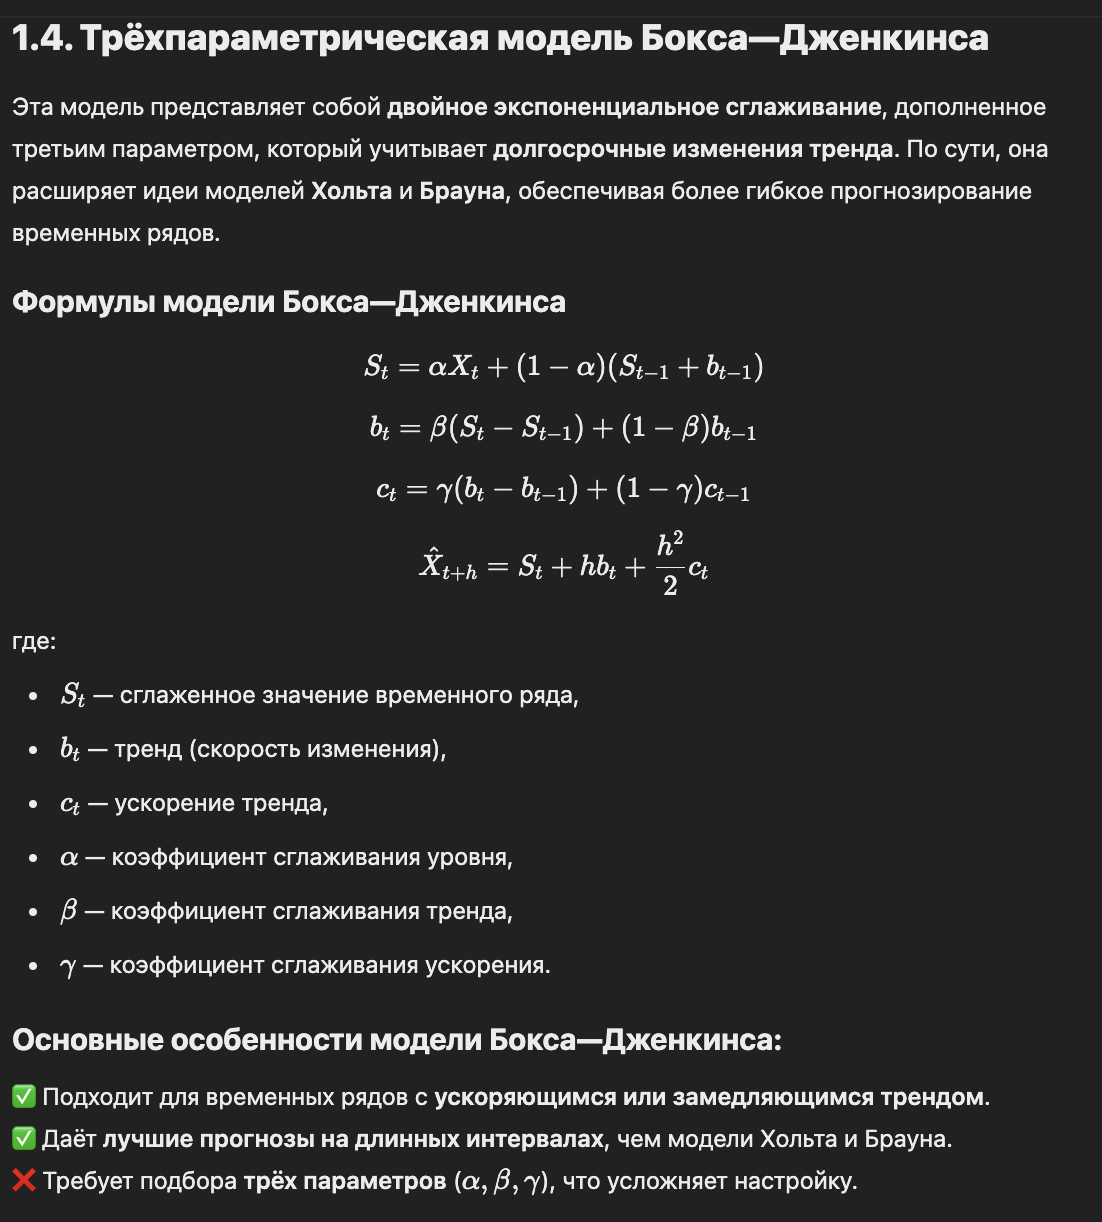

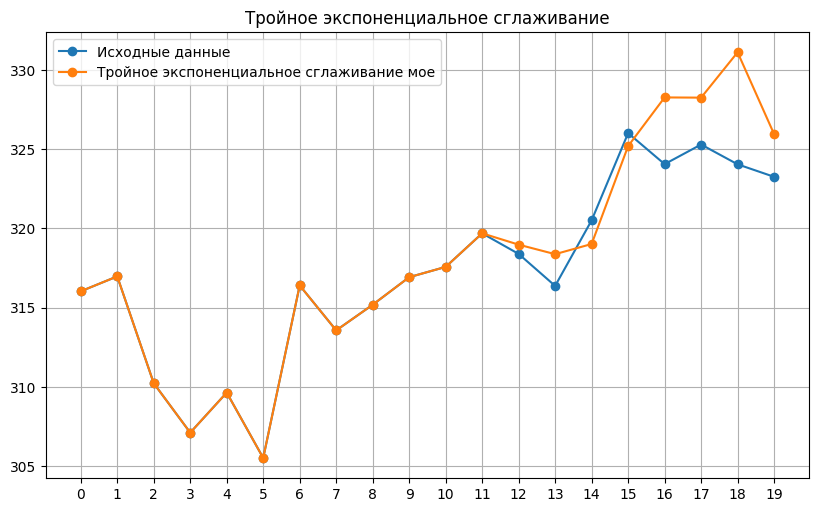

+--------------+-----------------+------------------------------------------+
| Номер строки | Исходные данные | Тройное экспоненциальное сглаживание мое |
+--------------+-----------------+------------------------------------------+
|      0       |     316.03      |                  316.03                  |
|      1       |     316.97      |                  316.97                  |
|      2       |     310.22      |                  310.22                  |
|      3       |      307.1      |                  307.1                   |
|      4       |     309.63      |                  309.63                  |
|      5       |      305.5      |                  305.5                   |
|      6       |      316.4      |                  316.4                   |
|      7       |     313.56      |                  313.56                  |
|      8       |     315.18      |                  315.18                  |
|      9       |     316.92      |                  316.92      

In [ ]:
import numpy as np
import pandas as pd


def triple_exponential_smoothing(data, alpha, beta, gamma, seasonal_periods):
    """
    Трёхпараметрическое экспоненциальное сглаживание (модель Бокса—Дженкинса).

    :param data: Список наблюдений (временной ряд)
    :param alpha: Параметр сглаживания уровня (0 < alpha <= 1)
    :param beta: Параметр сглаживания тренда (0 < beta <= 1)
    :param gamma: Параметр сглаживания сезонности (0 < gamma <= 1)
    :param seasonal_periods: Период сезонности
    :return: Список прогнозов
    """
    # Инициализация начальных значений
    n = len(data)
    l = [data[0]]  # Уровень
    b = [data[1] - data[0]]  # Тренд
    s = [data[i] - l[0] for i in range(seasonal_periods)]  # Сезонные компоненты
    forecasts = [data[0]]  # Первый прогноз равен первому значению

    # Вычисление прогнозов для остальных точек
    for t in range(1, n):
        if t >= seasonal_periods:
            seasonal_index = t % seasonal_periods
            # Обновление уровня
            l_new = alpha * (data[t] - s[seasonal_index]) + (1 - alpha) * (l[-1] + b[-1])
            l.append(l_new)

            # Обновление тренда
            b_new = beta * (l[-1] - l[-2]) + (1 - beta) * b[-1]
            b.append(b_new)

            # Обновление сезонности
            s_new = gamma * (data[t] - l_new) + (1 - gamma) * s[seasonal_index]
            s[seasonal_index] = s_new

            # Прогноз на следующий шаг
            forecast = l[-1] + b[-1] + s[seasonal_index]
            forecasts.append(forecast)
        else:
            forecasts.append(data[t])  # Для первых значений просто используем данные

    return forecasts

# Параметры сглаживания
alpha = 0.5  # Параметр сглаживания уровня
beta = 0.3   # Параметр сглаживания тренда
gamma = 0.2  # Параметр сглаживания сезонности
forecasts_my = triple_exponential_smoothing(data_main, alpha, beta, gamma, 12)

# Визуализация
data_triple_exponential_smoothing_plot = {
        "Исходные данные": data_main,
        f"Тройное экспоненциальное сглаживание мое": forecasts_my
    }

print_data('Тройное экспоненциальное сглаживание', data_triple_exponential_smoothing_plot, data_triple_exponential_smoothing_plot)

#### 1.5. Адаптация экспоненциального сглаживания с помощью следящего контрольного сигнала (Модель Тригга)

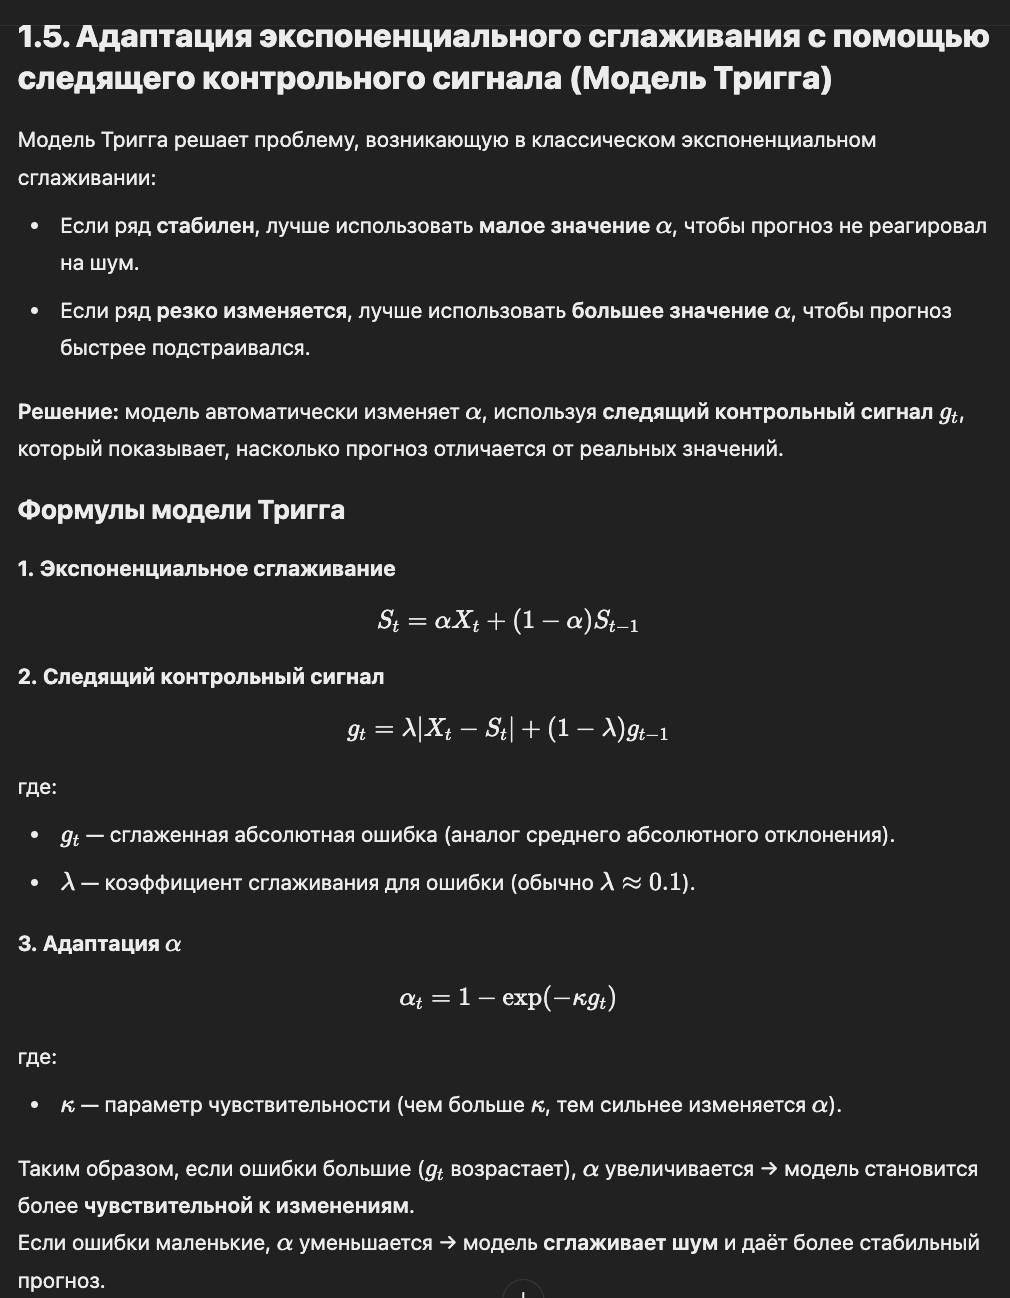

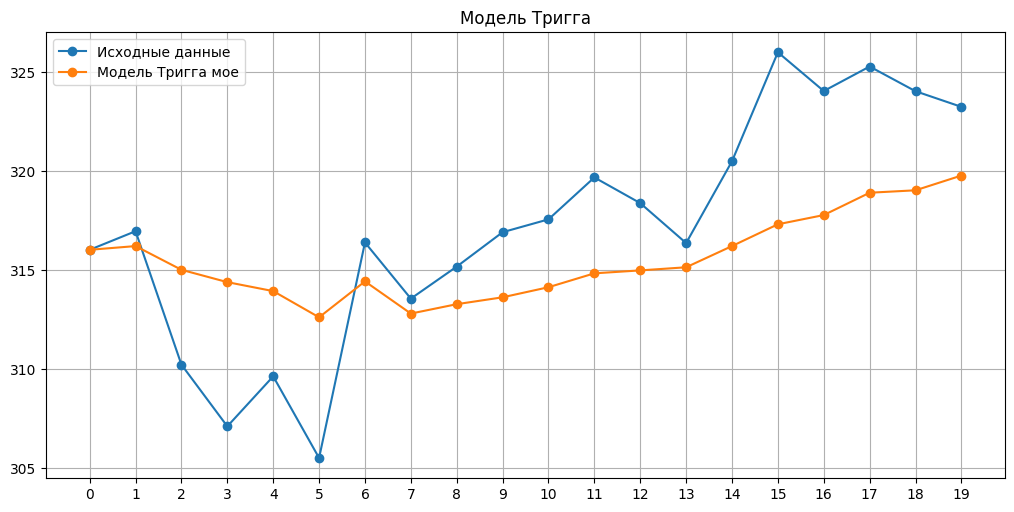

+--------------+-----------------+-------------------+
| Номер строки | Исходные данные | Модель Тригга мое |
+--------------+-----------------+-------------------+
|      0       |     316.03      |      316.03       |
|      1       |     316.97      |      316.218      |
|      2       |     310.22      |      315.018      |
|      3       |      307.1      |      314.394      |
|      4       |     309.63      |      313.941      |
|      5       |      305.5      |      312.616      |
|      6       |      316.4      |      314.433      |
|      7       |     313.56      |      312.804      |
|      8       |     315.18      |      313.28       |
|      9       |     316.92      |      313.628      |
|      10      |     317.57      |      314.138      |
|      11      |     319.69      |      314.84       |
|      12      |     318.39      |      314.988      |
|      13      |     316.37      |      315.146      |
|      14      |     320.51      |      316.219      |
|      15 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def trigg_model(data, alpha, control_limit):
    """
    Адаптация экспоненциального сглаживания с помощью следящего контрольного сигнала (Модель Тригга).

    :param data: Список наблюдений (временной ряд)
    :param alpha: Параметр сглаживания (0 < alpha <= 1)
    :param control_limit: Порог контроля
    :return: Список прогнозов
    """
    n = len(data)

    # Инициализация
    level = np.zeros(n)
    forecasts = np.zeros(n)

    # Начальные значения
    level[0] = data[0]
    forecasts[0] = data[0]

    # Основной цикл
    for t in range(1, n):
        # Обновление уровня
        level[t] = alpha * data[t] + (1 - alpha) * level[t-1]

        # Прогноз на следующий шаг
        forecasts[t] = level[t]

        # Контрольный сигнал
        if abs(data[t] - forecasts[t-1]) > control_limit:
            level[t] = forecasts[t-1]  # Адаптация уровня

    return forecasts

# Параметры модели
alpha = 0.2  # Параметр сглаживания
control_limit = 1.5  # Порог контроля
forecasts_my = trigg_model(data_main, alpha, control_limit)

# Визуализация
data_trigg_model_plot = {
        "Исходные данные": data_main,
        f"Модель Тригга мое": forecasts_my
    }

print_data('Модель Тригга', data_trigg_model_plot, data_trigg_model_plot)

### 2. Адаптивные комбинированные модели

Адаптивные комбинированные модели строятся на основе нескольких моделей прогнозирования. Их цель — объединить преимущества разных методов и повысить точность прогнозов.

В отличие от простого выбора одной модели, комбинированные модели адаптируются к изменениям во временном ряду, что делает их более гибкими.

#### 2.1. Адаптивные селекционные модели

Идея: в каждый момент времени выбирается наилучшая модель из набора возможных.

1.   Есть несколько моделей прогнозирования (например, экспоненциальное сглаживание, ARIMA, регрессионные модели и т. д.).
2.   Оценивается точность каждой модели (например, по среднеквадратической ошибке (MSE) или среднему абсолютному отклонению (MAE)).
3.   Выбирается наилучшая модель на текущий момент.
4.   Процесс повторяется при поступлении новых данных.

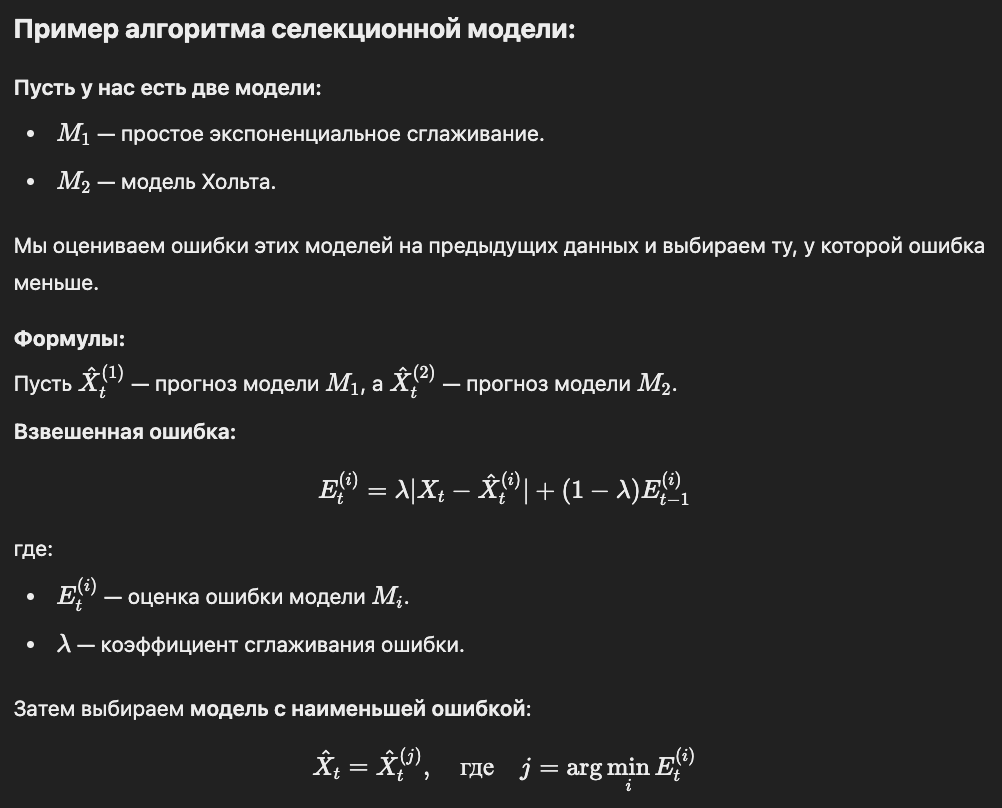


Exponential Smoothing
Holt's Method
Holt's Method
Exponential Smoothing
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Holt's Method
Exponential Smoothing
Holt's Method


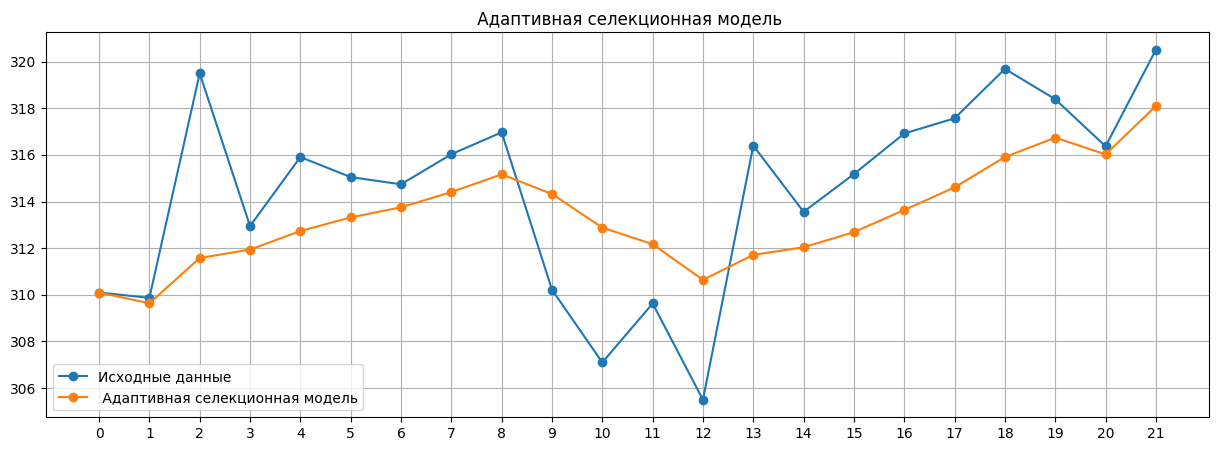

+--------------+-----------------+---------------------------------+
| Номер строки | Исходные данные |  Адаптивная селекционная модель |
+--------------+-----------------+---------------------------------+
|      0       |      310.1      |              310.1              |
|      1       |     309.87      |             309.64              |
|      2       |      319.5      |             311.579             |
|      3       |     312.95      |             311.943             |
|      4       |     315.91      |             312.736             |
|      5       |     315.05      |             313.321             |
|      6       |     314.74      |             313.755             |
|      7       |     316.03      |             314.406             |
|      8       |     316.97      |             315.166             |
|      9       |     310.22      |             314.325             |
|      10      |      307.1      |             312.884             |
|      11      |     309.63      |

In [ ]:
def adaptive_selection_model(data, alpha, beta):
    """
    Адаптивная селекционная модель, выбирающая между простым и двойным экспоненциальным сглаживанием.

    :param data: Список наблюдений (временной ряд)
    :param alpha: Параметр сглаживания уровня (0 < alpha <= 1)
    :param beta: Параметр сглаживания тренда (0 < beta <= 1)
    :return: Список прогнозов, выбранная модель на каждом шаге
    """
    n = len(data)
    forecasts_exp = exponential_smoothing_my(data, alpha)
    forecasts_holt = double_exponential_smoothing_my(data, alpha, beta)

    selected_forecasts = []
    selected_models = []

    for t in range(n):
        if t == 0:
            selected_forecasts.append(forecasts_exp[t])  # Первый прогноз
            selected_models.append('Exponential Smoothing')
        else:
            error_exp = abs(data[t] - forecasts_exp[t])
            error_holt = abs(data[t] - forecasts_holt[t])
            if error_exp < error_holt:
                selected_forecasts.append(forecasts_exp[t])
                selected_models.append('Exponential Smoothing')
            else:
                selected_forecasts.append(forecasts_holt[t])
                selected_models.append('Holt\'s Method')

    return selected_forecasts, selected_models

# Параметры модели
alpha = 0.2  # Параметр сглаживания
beta = 0.1   # Параметр сглаживания тренда
forecasts_my, selected_models = adaptive_selection_model(data_main, alpha, beta)

# Визуализация
data_adaptive_selection_model_plot = {
        "Исходные данные": data_main,
        f" Адаптивная селекционная модель": forecasts_my
    }

for i in selected_models:
  print(i)

print_data(' Адаптивная селекционная модель', data_adaptive_selection_model_plot, data_adaptive_selection_model_plot)


#### 2.2. Адаптивная гибридная модель

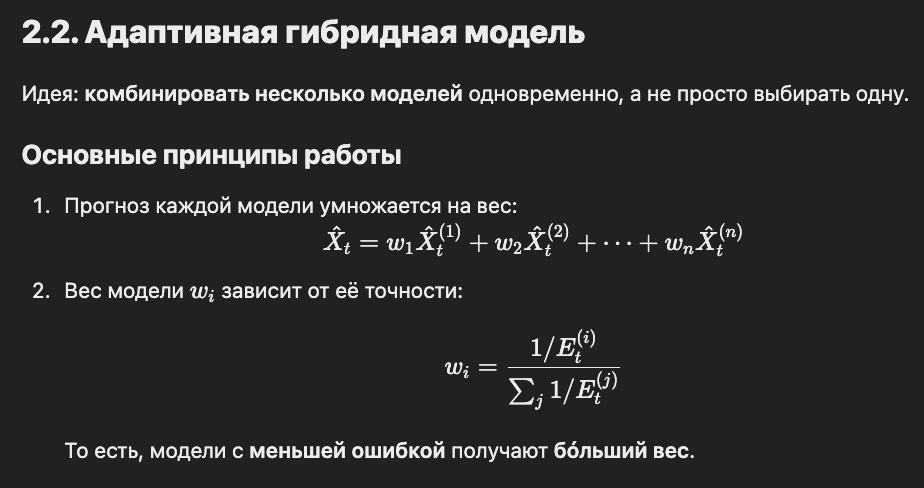

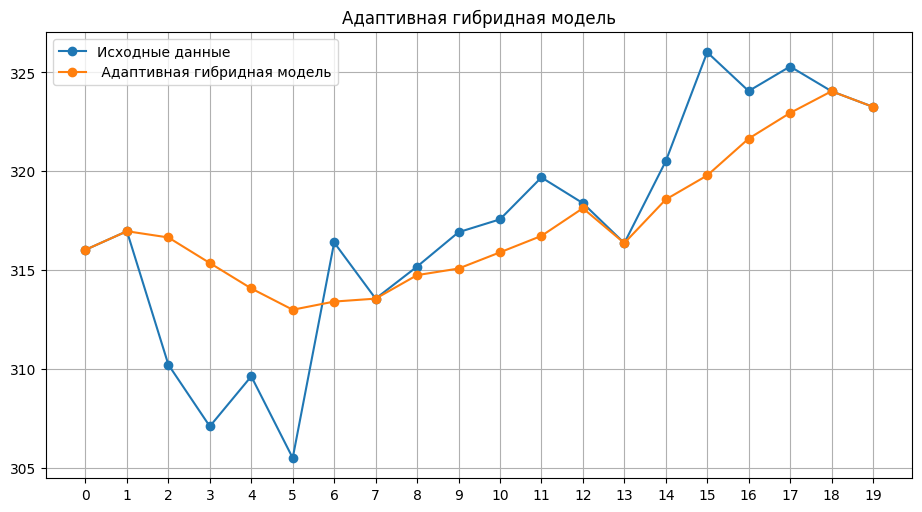

+--------------+-----------------+------------------------------+
| Номер строки | Исходные данные |  Адаптивная гибридная модель |
+--------------+-----------------+------------------------------+
|      0       |     316.03      |            316.03            |
|      1       |     316.97      |            316.97            |
|      2       |     310.22      |           316.654            |
|      3       |      307.1      |            315.36            |
|      4       |     309.63      |           314.075            |
|      5       |      305.5      |           312.998            |
|      6       |      316.4      |           313.411            |
|      7       |     313.56      |            313.56            |
|      8       |     315.18      |           314.749            |
|      9       |     316.92      |           315.082            |
|      10      |     317.57      |           315.901            |
|      11      |     319.69      |           316.732            |
|      12 

In [ ]:
def adaptive_hybrid_model_with_dynamic_weights(data, alpha, beta):
    """
    Адаптивная гибридная модель, использующая простое и двойное экспоненциальное сглаживание с динамическими весами.

    :param data: Список наблюдений (временной ряд)
    :param alpha: Параметр сглаживания уровня (0 < alpha <= 1)
    :param beta: Параметр сглаживания тренда (0 < beta <= 1)
    :return: Список прогнозов
    """
    n = len(data)
    forecasts_exp = exponential_smoothing_my(data, alpha)
    forecasts_holt = double_exponential_smoothing_my(data, alpha, beta)

    selected_forecasts = []
    weights = []

    for t in range(n):
        if t == 0:
            # Инициализация весов
            weight_exp = 0.5
            weight_holt = 0.5
        else:
            # Вычисление ошибок
            error_exp = abs(data[t] - forecasts_exp[t])
            error_holt = abs(data[t] - forecasts_holt[t])

            # Обновление весов на основе ошибок
            total_error = error_exp + error_holt
            weight_exp = error_holt / total_error if total_error > 0 else 0.5
            weight_holt = error_exp / total_error if total_error > 0 else 0.5

        # Взвешенный прогноз
        weighted_forecast = (weight_exp * forecasts_exp[t]) + (weight_holt * forecasts_holt[t])
        selected_forecasts.append(weighted_forecast)
        weights.append((weight_exp, weight_holt))

    return selected_forecasts, weights

# Пример использования
alpha = 0.2  # Параметр сглаживания
beta = 0.1   # Параметр сглаживания тренда

forecasts_my, weights = adaptive_hybrid_model_with_dynamic_weights(data_main, alpha, beta)

# Визуализация
data_adaptive_hybrid_model_plot = {
    "Исходные данные": data_main,
    f" Адаптивная гибридная модель": forecasts_my
}

print_data('Адаптивная гибридная модель', data_adaptive_hybrid_model_plot, data_adaptive_hybrid_model_plot)

# Вывод весов
for i, (w_exp, w_holt) in enumerate(weights):
    print(f"Шаг {i}:   Вес простого сглаживания = {w_exp:.3f},   Вес двойного сглаживания = {w_holt:.3f},   Макс = {1 if (w_exp >= w_holt) else 2 }")

### 3. Адаптивная модель прогнозирования временного ряда, генерируемого авторегрессионной схемой с дрейфующими коэффициентами

Адаптивная модель прогнозирования временного ряда, генерируемого авторегрессионной (АР) схемой с дрейфующими коэффициентами, относится к классу моделей, учитывающих изменяющиеся во времени параметры. Это важно в случаях, когда статистические свойства ряда эволюционируют, и стандартные методы прогнозирования (основанные на стационарности) становятся неэффективными.

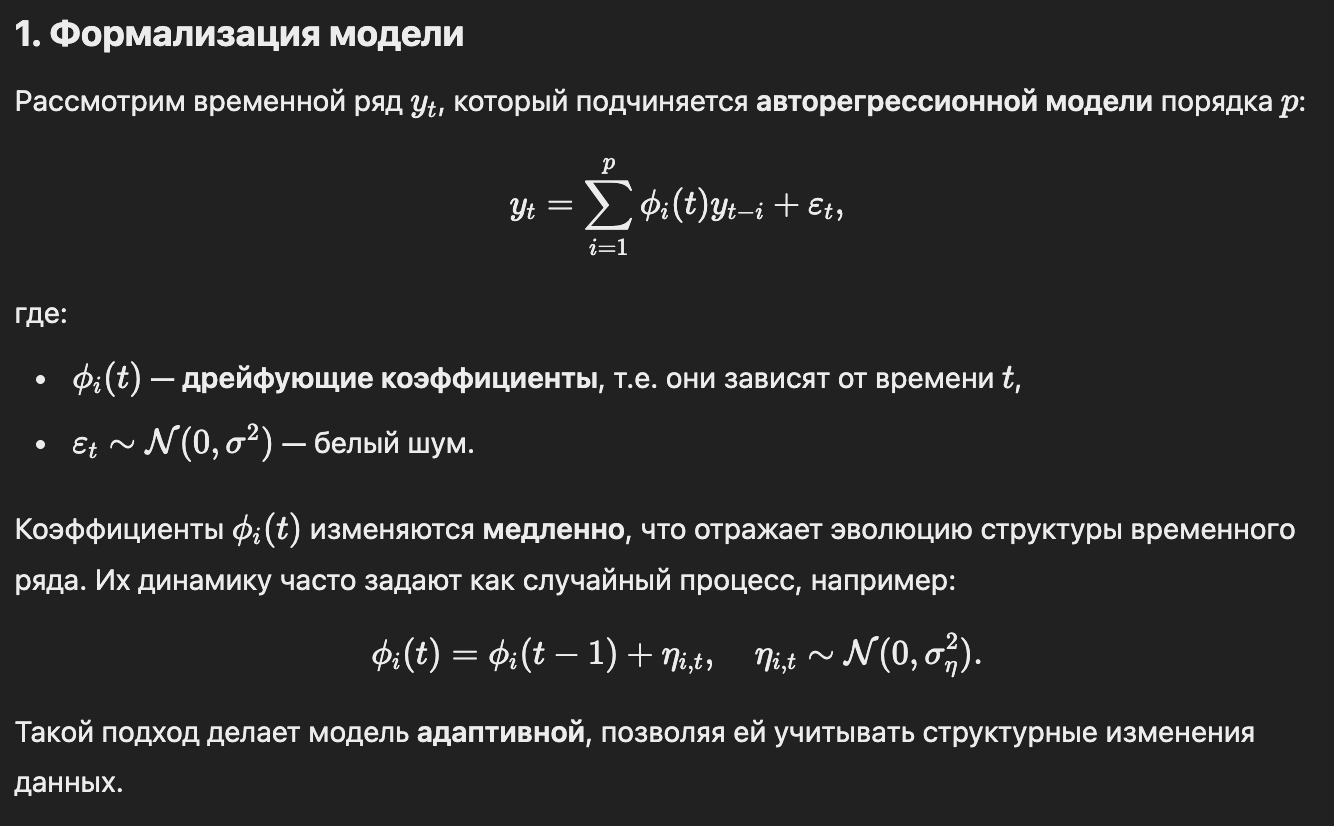

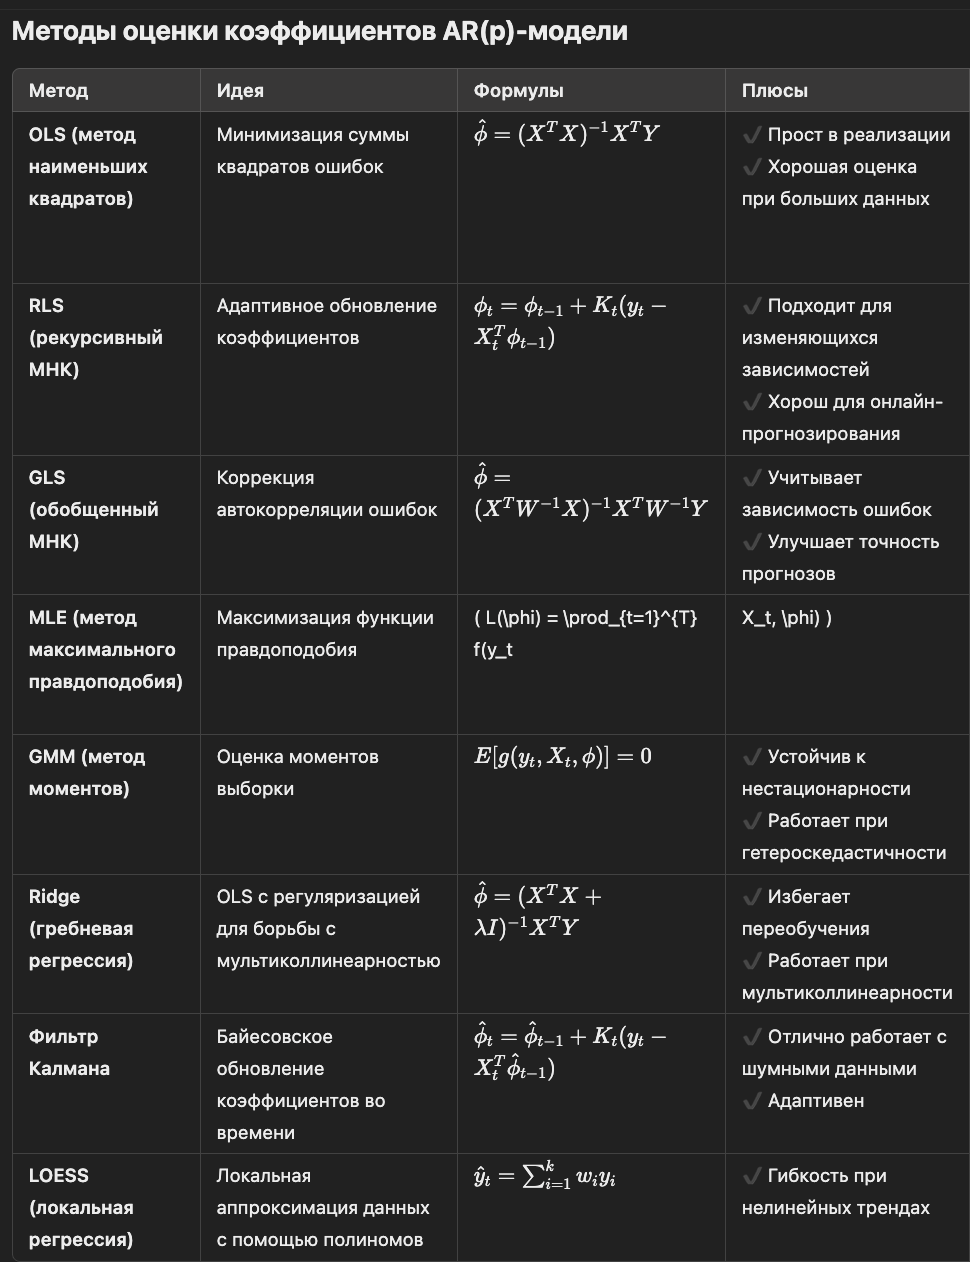

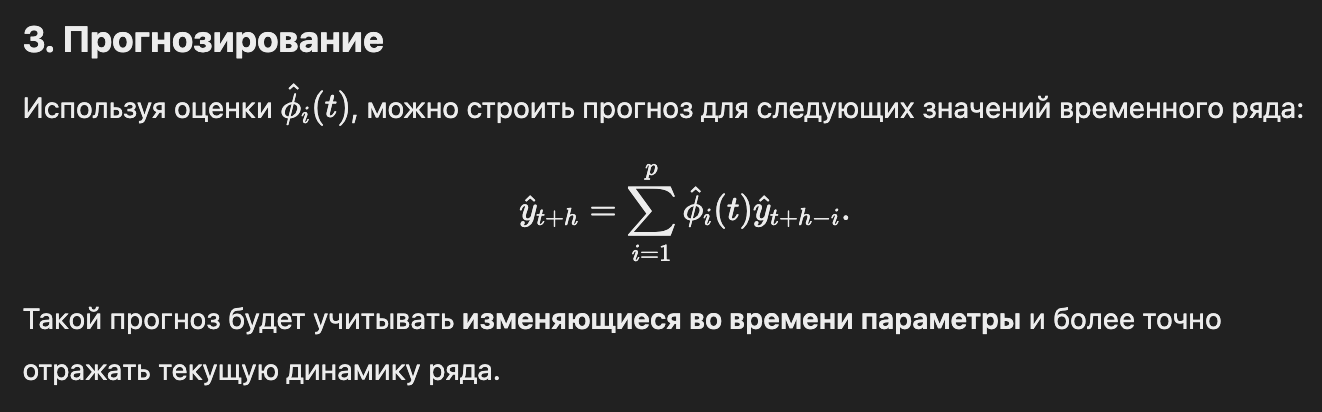

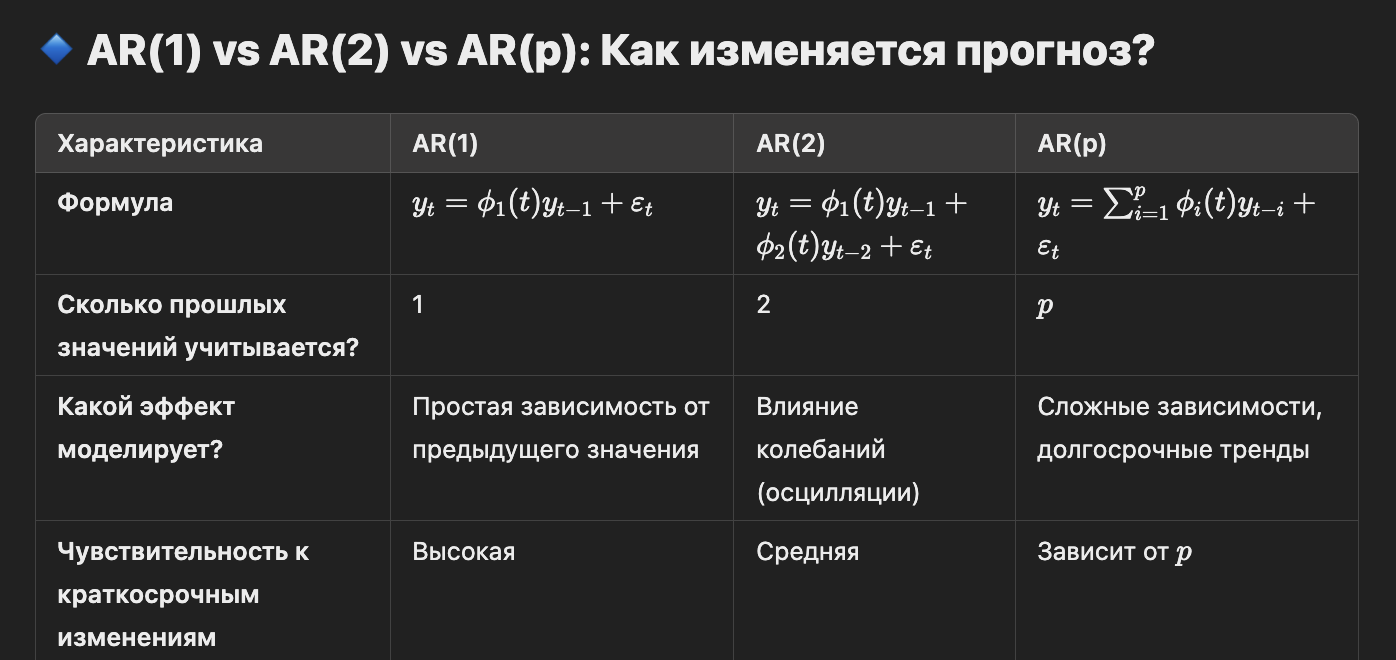

#### 3.1. Рекурсивный метод наименьших квадратов (RLS)

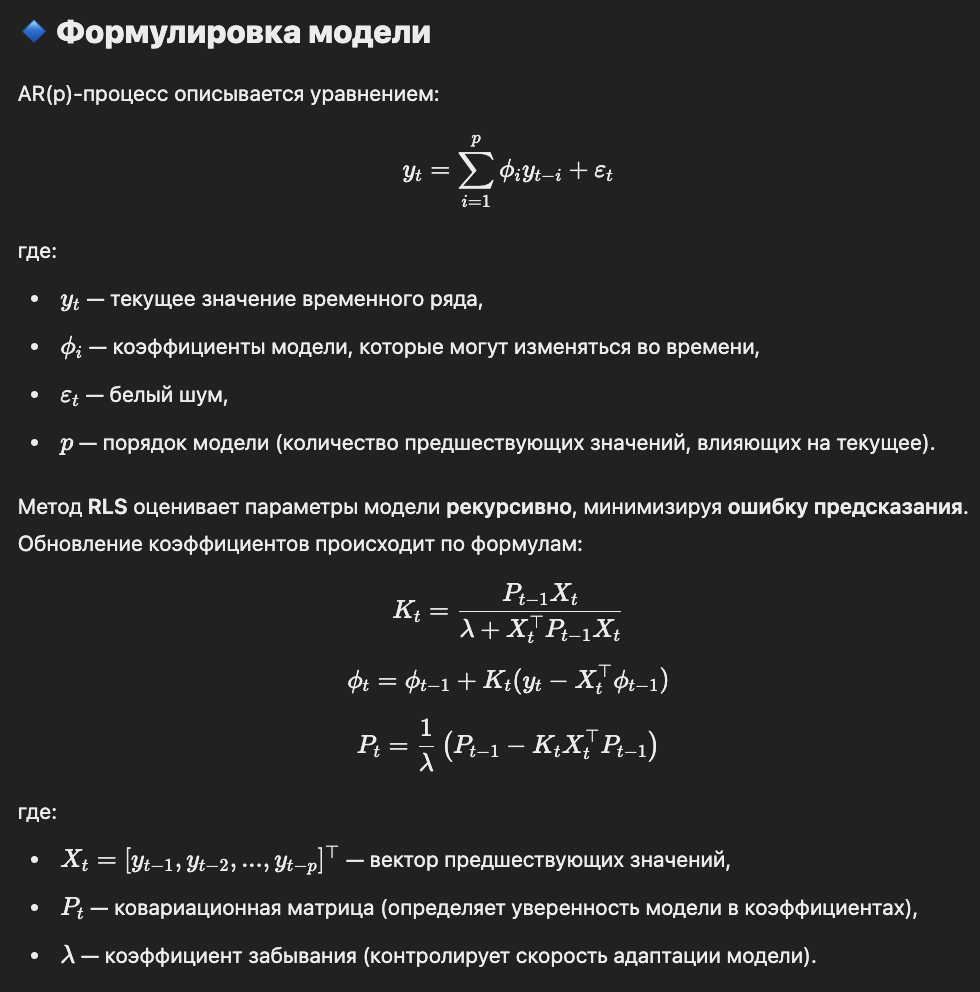

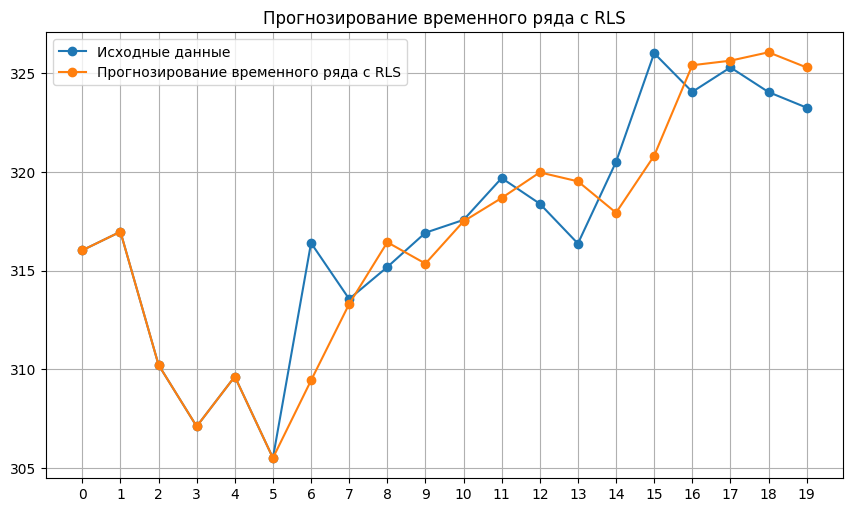

+--------------+-----------------+---------------------------------------+
| Номер строки | Исходные данные | Прогнозирование временного ряда с RLS |
+--------------+-----------------+---------------------------------------+
|      0       |     316.03      |                316.03                 |
|      1       |     316.97      |                316.97                 |
|      2       |     310.22      |                310.22                 |
|      3       |      307.1      |                 307.1                 |
|      4       |     309.63      |                309.63                 |
|      5       |      305.5      |                 305.5                 |
|      6       |      316.4      |                309.433                |
|      7       |     313.56      |                313.307                |
|      8       |     315.18      |                316.437                |
|      9       |     316.92      |                315.355                |
|      10      |     317.

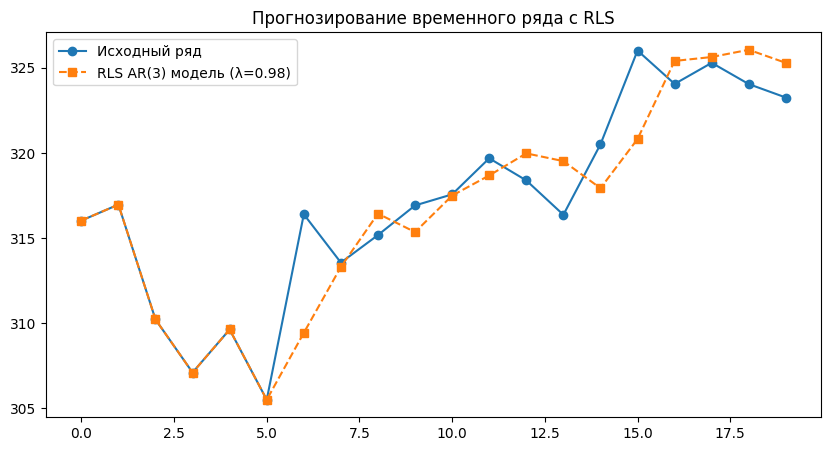

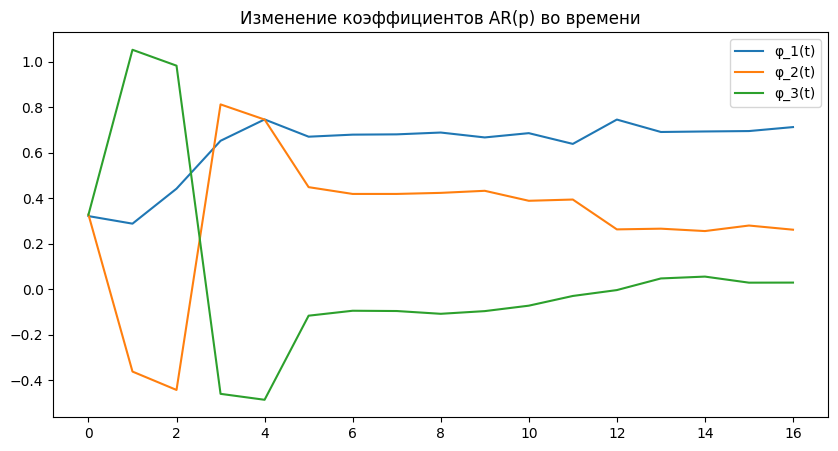

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rls_ar_forecast(data, p, lambda_):
    """
    Прогнозирование временного ряда с помощью AR(p) модели и метода RLS.

    :param data: Временной ряд (список наблюдений)
    :param p: Порядок модели AR(p)
    :param lambda_: Коэффициент забывания (0.95 ≤ lambda_ ≤ 1)
    :return: Прогнозный ряд, коэффициенты
    """
    n = len(data)
    forecasts = np.zeros(n)  # Создаем массив для прогнозов
    forecasts[:p] = data[:p]  # Первые p значений задаются вручную

    # Инициализация коэффициентов и ковариационной матрицы
    phi = np.zeros(p)  # Начальные коэффициенты
    P = np.eye(p) * 1000  # Ковариационная матрица (большие значения → слабая уверенность)

    phi_history = []  # Храним изменения коэффициентов во времени

    for t in range(p, n):
        X_t = np.array(data[t-p:t][::-1])  # Вектор регрессоров
        y_t = data[t]

        # Вычисление K_t (вектор коррекции)
        P_X = P @ X_t
        K_t = P_X / (lambda_ + X_t.T @ P_X)

        # Обновление коэффициентов
        phi = phi + K_t * (y_t - X_t @ phi)

        # Обновление ковариационной матрицы
        P = (P - np.outer(K_t, P_X)) / lambda_

        # Прогноз
        forecasts[t] = X_t @ phi

        # Сохранение коэффициентов
        phi_history.append(phi.copy())

    return forecasts, np.array(phi_history)

# Параметры модели
lambda_ = 0.98  # Коэффициент забывания (обычно 0.95 - 1)
p = 3  # Порядок AR(p)

forecasts_rls, phi_history = rls_ar_forecast(data_main, p, lambda_)

# Визуализация
data_rls_ar_forecast_plot = {
        "Исходные данные": data_main,
        f"Прогнозирование временного ряда с RLS": forecasts_rls,
    }

print_data('Прогнозирование временного ряда с RLS', data_rls_ar_forecast_plot, data_rls_ar_forecast_plot)

# Визуализация прогноза
plt.figure(figsize=(10, 5))
plt.plot(data_main, label="Исходный ряд", marker="o", linestyle="-")
plt.plot(forecasts_rls, label=f"RLS AR({p}) модель (λ={lambda_})", marker="s", linestyle="--")
plt.legend()
plt.title("Прогнозирование временного ряда с RLS")
plt.show()

# Визуализация изменения коэффициентов
plt.figure(figsize=(10, 5))
for i in range(p):
    plt.plot(phi_history[:, i], label=f"φ_{i+1}(t)")
plt.legend()
plt.title("Изменение коэффициентов AR(p) во времени")
plt.show()

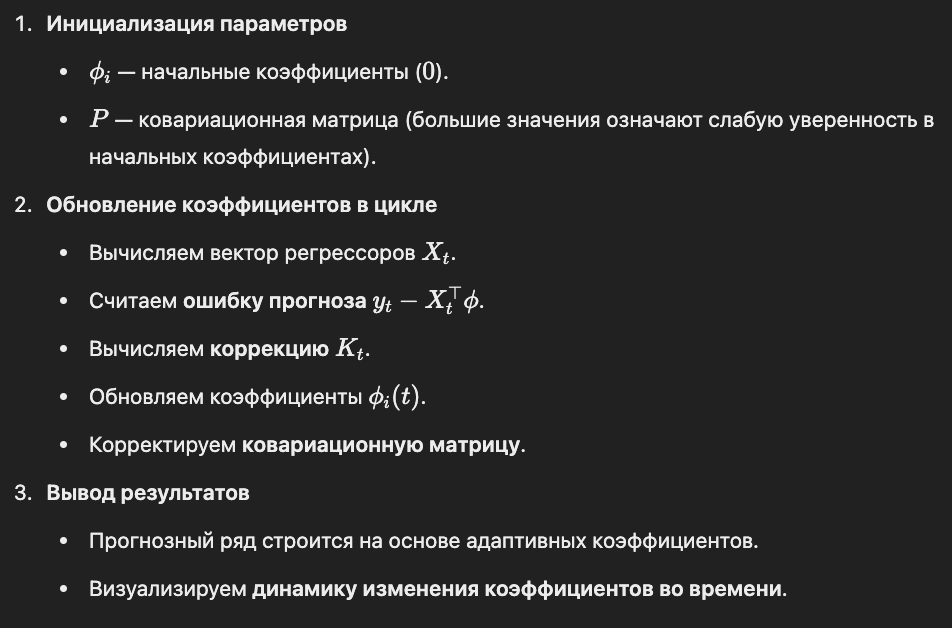

### 4. Модели авторегрессии и проинтегрированного скользящего среднего ❌

#### 4.1. Автокорреляционная (АКФ) и частичная автокорреляционная функции (ЧАКФ)

Перед тем как строить модели AR, MA, ARMA, ARIMA, необходимо определить структуру временного ряда.
Для этого используют автокорреляционную функцию (АКФ) и частичную автокорреляционную функцию (ЧАКФ).

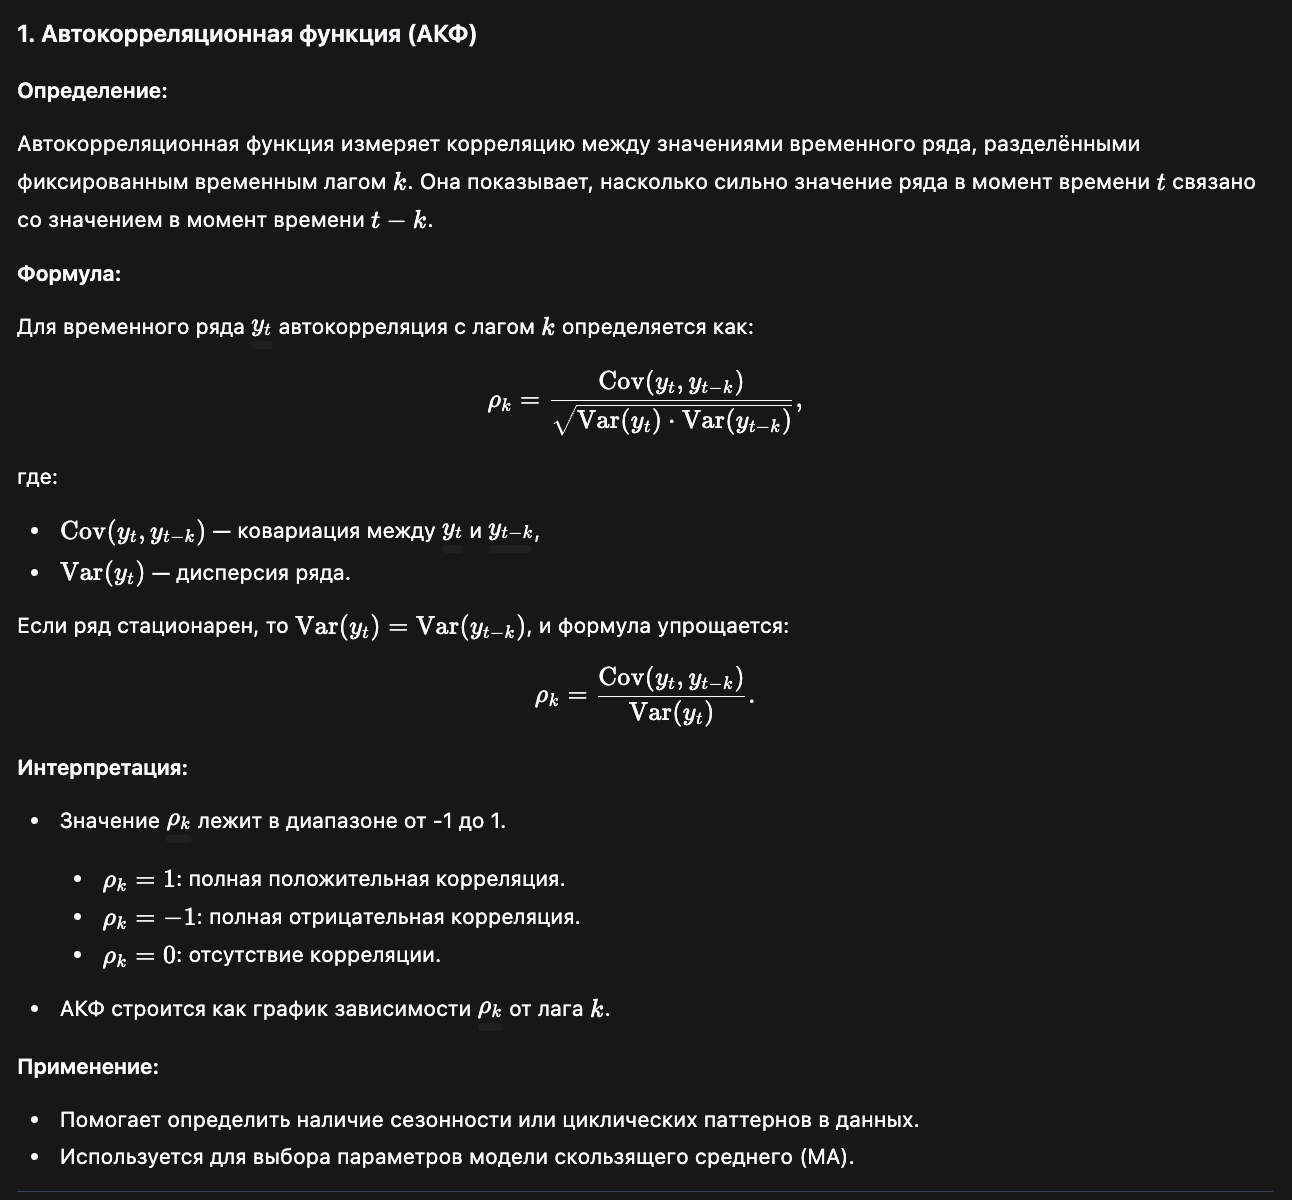

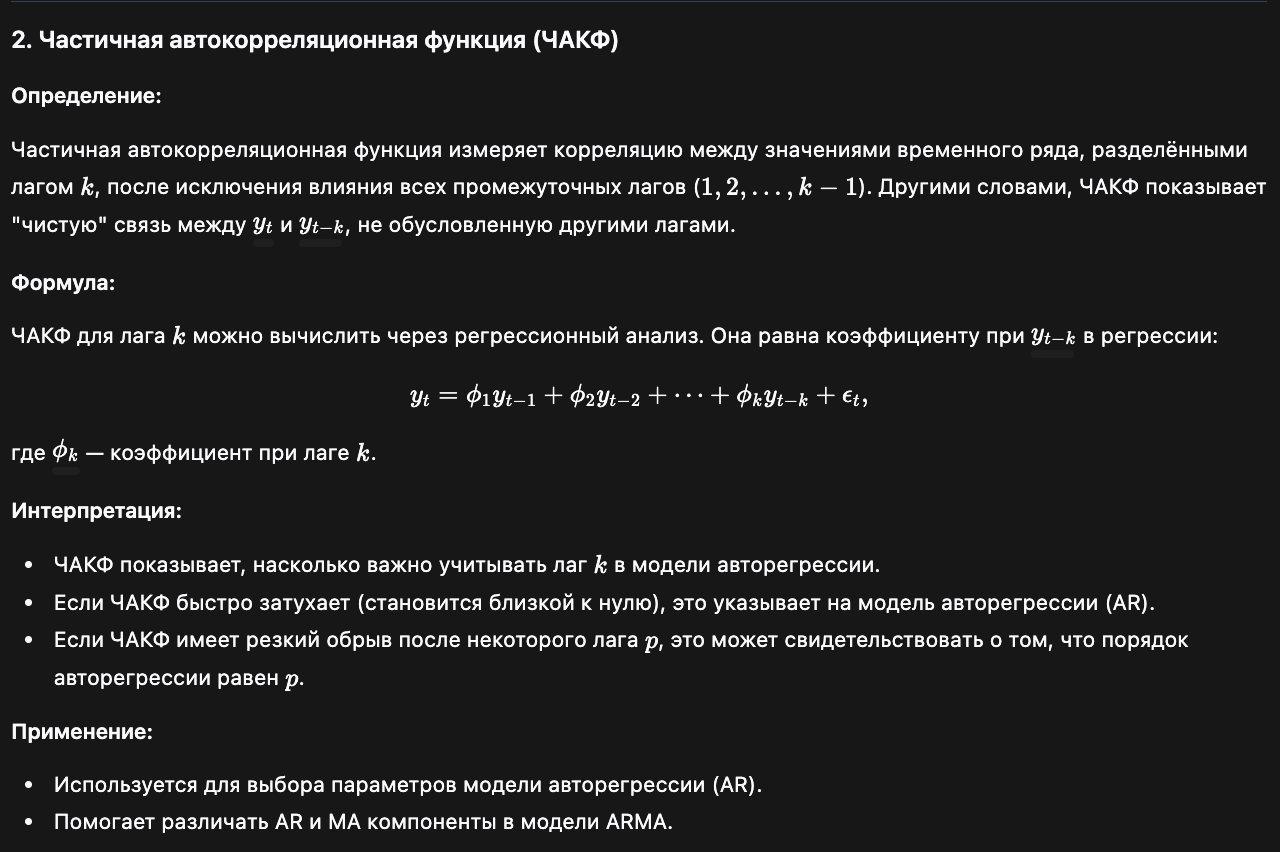

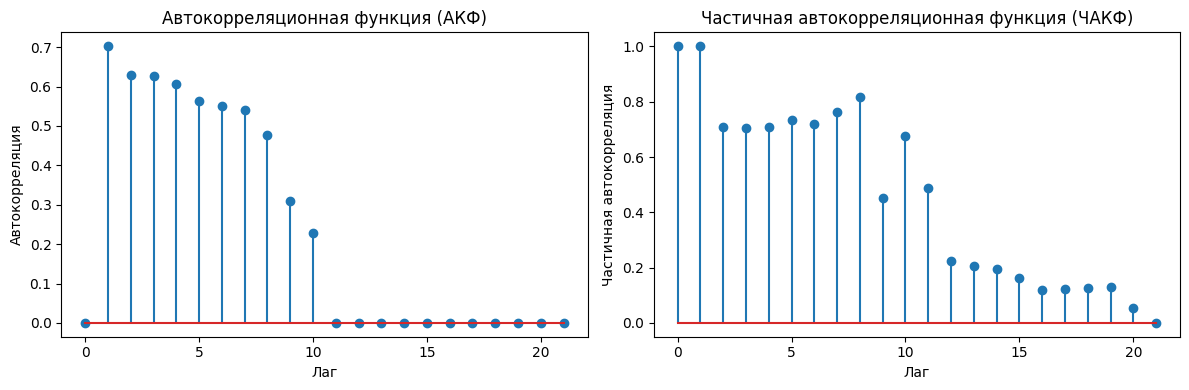

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления автокорреляции
def autocorr(x, lag):
    """
    Вычисляет автокорреляцию для заданного лага.
    """
    mean = np.mean(x)
    var = np.var(x)
    numerator = np.sum((x[lag:] - mean) * (x[:-lag] - mean))
    return numerator / (var * len(x))

# Функция для вычисления АКФ
def acf(x, max_lag):
    """
    Вычисляет автокорреляционную функцию (АКФ) для заданного количества лагов.
    """
    return [autocorr(x, lag) for lag in range(max_lag + 1)]

# Функция для вычисления ЧАКФ
def pacf(x, max_lag):
    """
    Вычисляет частичную автокорреляционную функцию (ЧАКФ) с помощью регрессии.
    """
    pacf_values = []
    for lag in range(1, max_lag + 1):
        # Создаем матрицу признаков для авторегрессии
        X_pacf = np.array([x[i:i + lag] for i in range(len(x) - lag)])
        y_pacf = x[lag:]

        # Убедимся, что X_pacf является двумерным массивом
        if X_pacf.ndim == 1:
            X_pacf = X_pacf.reshape(-1, 1)  # Преобразуем в двумерный массив

        # Решаем задачу линейной регрессии методом наименьших квадратов
        coefficients = np.linalg.lstsq(X_pacf, y_pacf, rcond=None)[0]
        pacf_values.append(coefficients[-1])  # Берем последний коэффициент
    return [1.0] + pacf_values  # Добавляем начальное значение PACF(0) = 1

# Параметры для анализа
X = data_main
n = len(X)
max_lag = n

# Вычисление АКФ и ЧАКФ
acf_values = acf(X, max_lag)
pacf_values = pacf(X, max_lag)

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# График АКФ
axes[0].stem(range(len(acf_values)), acf_values)
axes[0].set_title("Автокорреляционная функция (АКФ)")
axes[0].set_xlabel("Лаг")
axes[0].set_ylabel("Автокорреляция")

# График ЧАКФ
axes[1].stem(range(len(pacf_values)), pacf_values)
axes[1].set_title("Частичная автокорреляционная функция (ЧАКФ)")
axes[1].set_xlabel("Лаг")
axes[1].set_ylabel("Частичная автокорреляция")

plt.tight_layout()
plt.show()

#### 4.2. Авторегрессионные модели AR(p)

Разница между 3 и 4 пунктами :

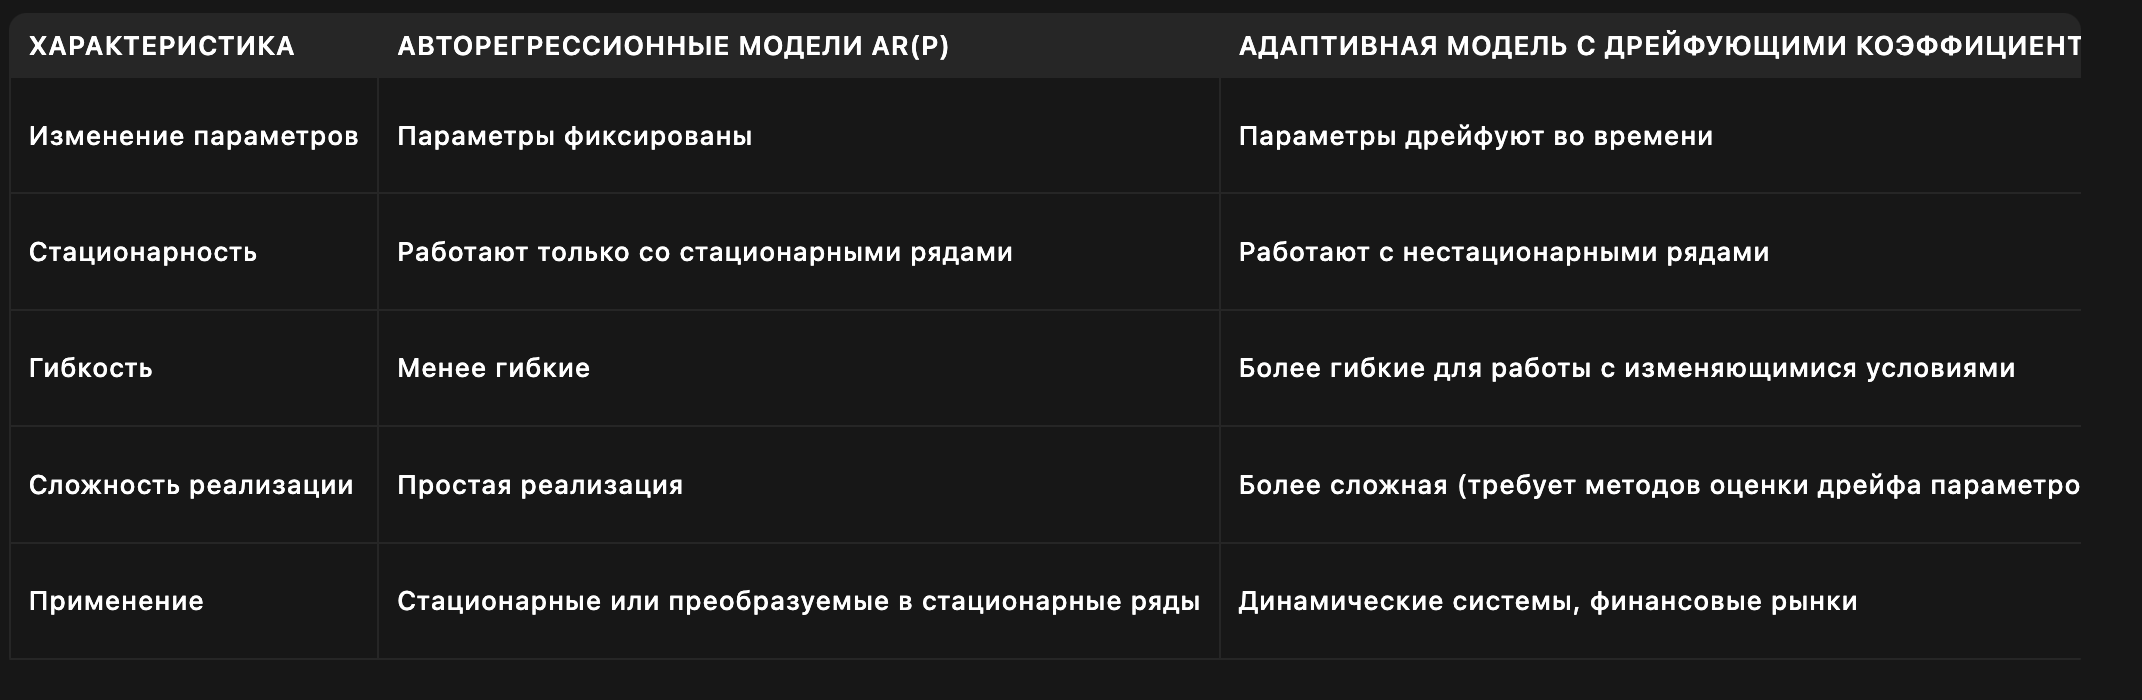

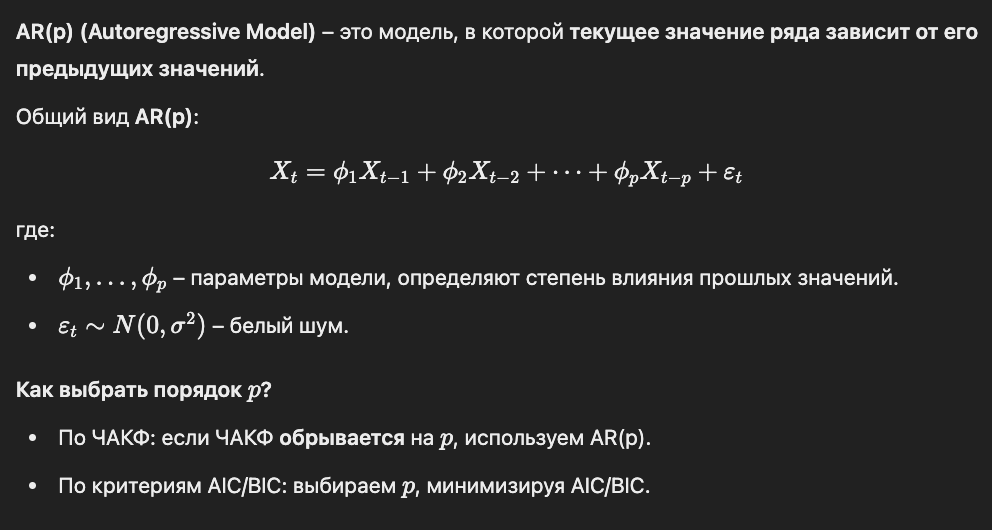

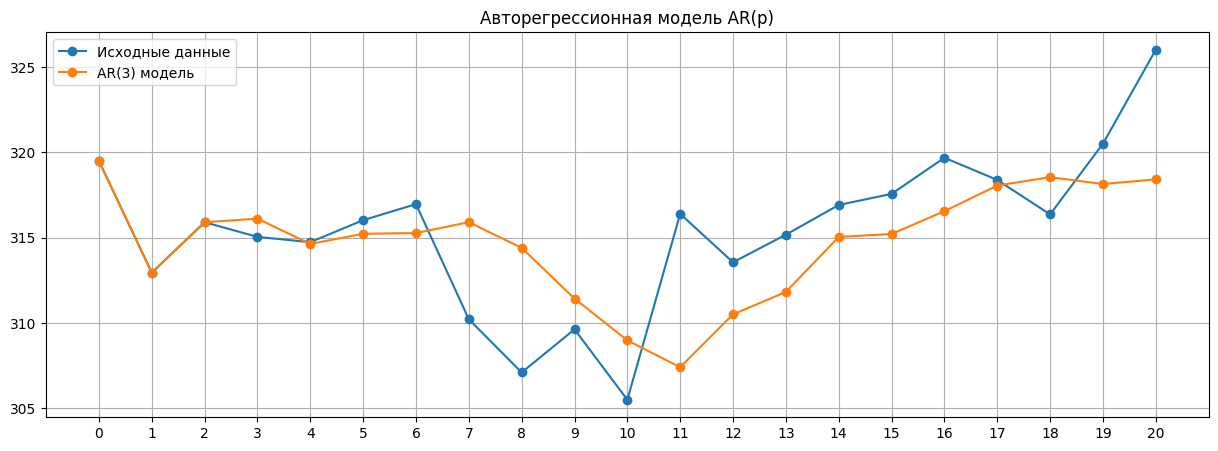

+--------------+-----------------+--------------+
| Номер строки | Исходные данные | AR(3) модель |
+--------------+-----------------+--------------+
|      0       |      319.5      |    319.5     |
|      1       |     312.95      |    312.95    |
|      2       |     315.91      |    315.91    |
|      3       |     315.05      |    316.12    |
|      4       |     314.74      |   314.637    |
|      5       |     316.03      |   315.233    |
|      6       |     316.97      |   315.273    |
|      7       |     310.22      |   315.913    |
|      8       |      307.1      |   314.407    |
|      9       |     309.63      |    311.43    |
|      10      |      305.5      |   308.983    |
|      11      |      316.4      |    307.41    |
|      12      |     313.56      |    310.51    |
|      13      |     315.18      |    311.82    |
|      14      |     316.92      |   315.047    |
|      15      |     317.57      |    315.22    |
|      16      |     319.69      |   316.557    |


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ar_model(data, p):
    """
    Авторегрессионная модель AR(p).

    :param data: Список наблюдений (временной ряд)
    :param p: Порядок модели (количество лагов)
    :return: Список прогнозов
    """
    # Преобразуем данные в массив numpy для удобства работы
    data = np.array(data)

    # Инициализация списка прогнозов
    forecasts = []

    # Для первых p значений прогноза нет, так как недостаточно данных
    forecasts.extend(data[:p])

    # Вычисление прогнозов для остальных точек
    for t in range(p, len(data)):
        # Линейная комбинация предыдущих p значений
        forecast = np.sum([data[t - i] * (1 / p) for i in range(1, p + 1)])
        forecasts.append(forecast)

    return forecasts

# Пример использования
p = 3  # Порядок модели AR(p)
forecasts_ar = ar_model(data_main, p)

# Визуализация
data_ar_plot = {
    "Исходные данные": data_main,
    f"AR({p}) модель": forecasts_ar
}

print_data('Авторегрессионная модель AR(p)', data_ar_plot, data_ar_plot)

#### 4.3. Модели скользящего среднего MA(q)

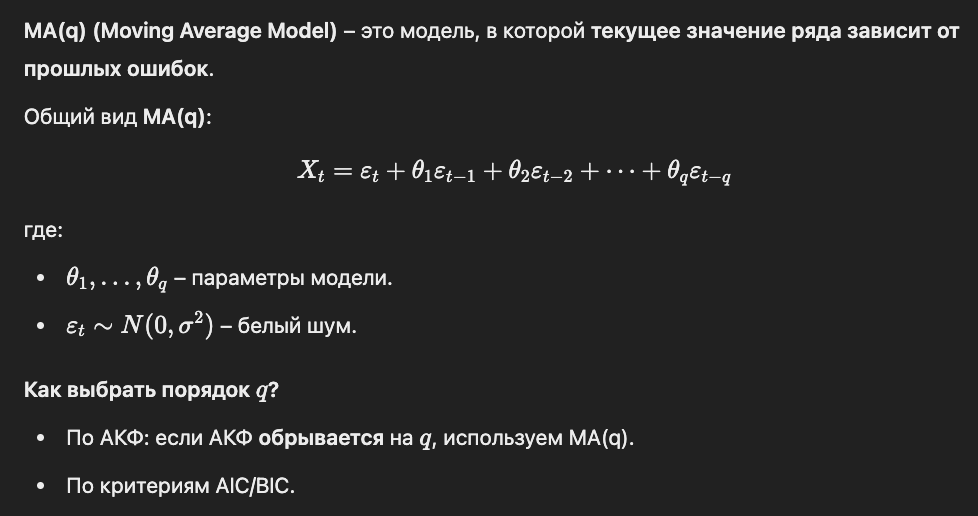

Можно добавить оценту коэфф - параметров моделей, тогда расчеты будут более точными

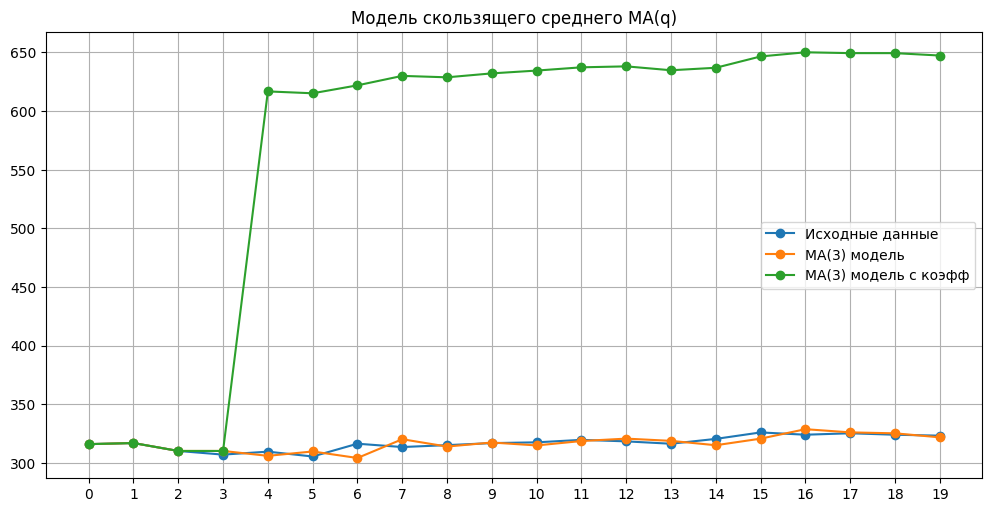

+--------------+-----------------+--------------+----------------------+
| Номер строки | Исходные данные | MA(3) модель | MA(3) модель с коэфф |
+--------------+-----------------+--------------+----------------------+
|      0       |     316.03      |    316.03    |        316.03        |
|      1       |     316.97      |    316.97    |        316.97        |
|      2       |     310.22      |    310.22    |        310.22        |
|      3       |      307.1      |    310.22    |        310.22        |
|      4       |     309.63      |    306.06    |        616.73        |
|      5       |      305.5      |    309.78    |        615.13        |
|      6       |      316.4      |   304.223    |        621.9         |
|      7       |     313.56      |   320.222    |        629.96        |
|      8       |     315.18      |   313.971    |        628.74        |
|      9       |     316.92      |   317.421    |        632.1         |
|      10      |     317.57      |   314.935    |  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def ma_model(data, q):
    """
    Модель скользящего среднего MA(q).

    :param data: Список наблюдений (временной ряд)
    :param q: Порядок модели (количество лагов ошибок)
    :return: Список прогнозов
    """
    # Преобразуем данные в массив numpy для удобства работы
    data = np.array(data)

    # Инициализация списка прогнозов
    forecasts = []

    # Для первых q значений прогноз равен исходным данным
    forecasts.extend(data[:q])

    # Вычисление прогнозов для остальных точек
    for t in range(q, len(data)):
        # Ошибки прогноза (разница между реальными данными и прогнозами)
        errors = [data[t - i] - forecasts[t - i] for i in range(1, q + 1)]

        # Прогноз как среднее арифметическое ошибок
        forecast = data[t - 1] + np.mean(errors)
        forecasts.append(forecast)

    return forecasts

def ma_model_with_coeffs(data, q):
    """
    Модель скользящего среднего MA(q) с оценкой коэффициентов методом наименьших квадратов.

    :param data: Список наблюдений (временной ряд)
    :param q: Порядок модели (количество лагов ошибок)
    :return: Список прогнозов
    """
    data = np.array(data)
    forecasts = []

    # Для первых q значений прогноз равен исходным данным
    forecasts.extend(data[:q])

    # Последовательное вычисление прогнозов
    for t in range(q, len(data)):
        # Создание матрицы признаков для текущей точки
        X = np.array([data[t - i] - forecasts[t - i] for i in range(1, q + 1)]).reshape(1, -1)

        # Целевое значение для текущей точки
        y = data[t]

        # Оценка коэффициентов методом наименьших квадратов
        coefficients = np.linalg.lstsq(X.T @ X, X.T @ np.array([y]), rcond=None)[0].flatten()

        # Вычисление прогноза
        errors = [data[t - i] - forecasts[t - i] for i in range(1, q + 1)]
        forecast = data[t - 1] + np.sum(coefficients * errors)
        forecasts.append(forecast)

    return forecasts

# Пример использования
q = 3  # Порядок модели MA(q)
forecasts_ma = ma_model(data_main, q)
forecasts_ma_with_coeffs = ma_model_with_coeffs(data_main, q)

# Визуализация
data_ma_plot = {
    "Исходные данные": data_main,
    f"MA({q}) модель": forecasts_ma,
    f"MA({q}) модель с коэфф": forecasts_ma_with_coeffs
}

print_data('Модель скользящего среднего MA(q)', data_ma_plot, data_ma_plot)

#### 4.4. Смешанные модели ARMA(p,q)

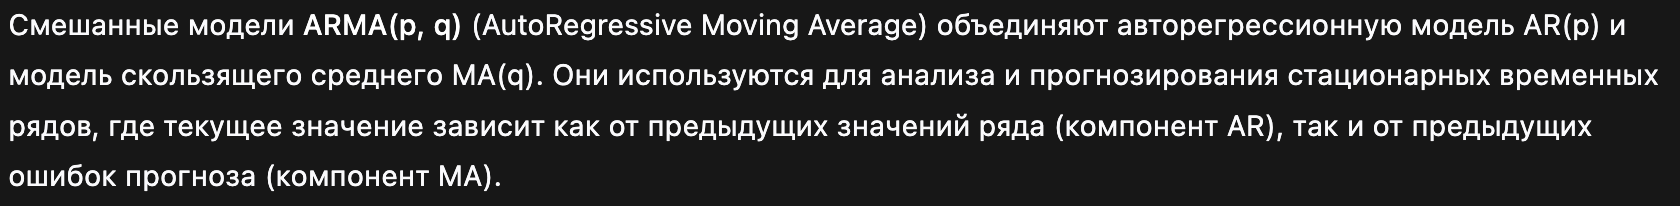

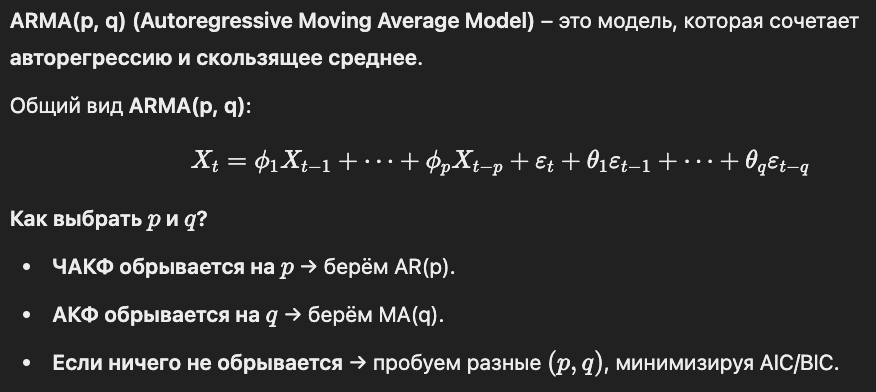

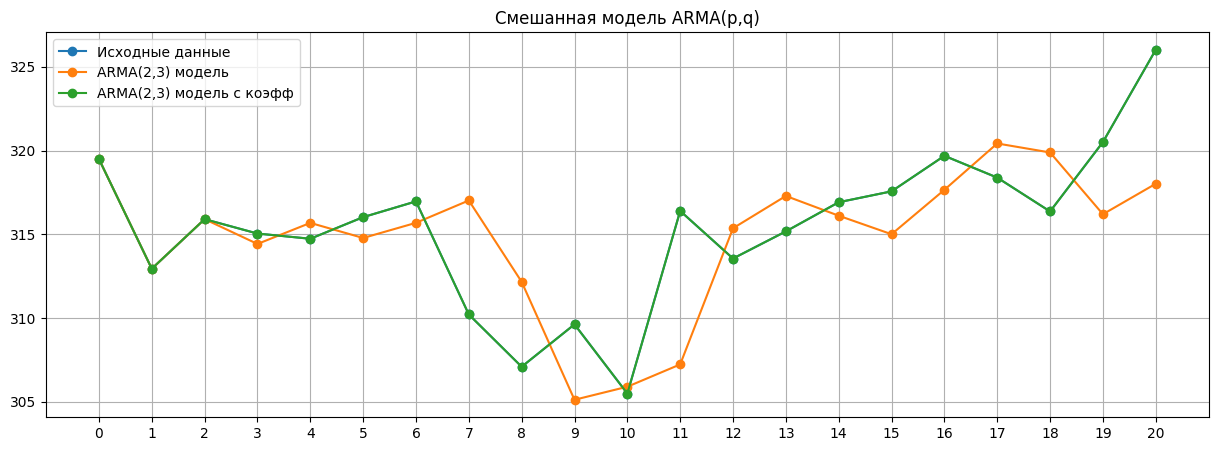

+--------------+-----------------+------------------+--------------------------+
| Номер строки | Исходные данные | ARMA(2,3) модель | ARMA(2,3) модель с коэфф |
+--------------+-----------------+------------------+--------------------------+
|      0       |      319.5      |      319.5       |          319.5           |
|      1       |     312.95      |      312.95      |          312.95          |
|      2       |     315.91      |      315.91      |          315.91          |
|      3       |     315.05      |      314.43      |          315.05          |
|      4       |     314.74      |     315.687      |          314.74          |
|      5       |     316.03      |     314.786      |          316.03          |
|      6       |     316.97      |     315.691      |          316.97          |
|      7       |     310.22      |     317.025      |          310.22          |
|      8       |      307.1      |     312.168      |          307.1           |
|      9       |     309.63 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def arma_model(data, p, q):
    """
    Смешанная модель ARMA(p, q).

    :param data: Список наблюдений (временной ряд)
    :param p: Порядок авторегрессионной части (AR)
    :param q: Порядок скользящего среднего (MA)
    :return: Список прогнозов
    """
    # Преобразуем данные в массив numpy для удобства работы
    data = np.array(data)

    # Инициализация списка прогнозов
    forecasts = []

    # Для первых max(p, q) значений прогноз равен исходным данным
    n_start = max(p, q)
    forecasts.extend(data[:n_start])

    # Вычисление прогнозов для остальных точек
    for t in range(n_start, len(data)):
        # Авторегрессионная часть (AR)
        ar_component = np.sum([data[t - i] * (1 / p) for i in range(1, p + 1)]) if p > 0 else 0

        # Скользящее среднее (MA)
        errors = [data[t - i] - forecasts[t - i] for i in range(1, q + 1)]
        ma_component = np.mean(errors) if q > 0 else 0

        # Прогноз как сумма AR и MA компонентов
        forecast = ar_component + ma_component
        forecasts.append(forecast)

    return forecasts

def arma_model_with_coeffs(data, p, q):
    """
    Смешанная модель ARMA(p, q) с оценкой коэффициентов методом наименьших квадратов.

    :param data: Список наблюдений (временной ряд)
    :param p: Порядок авторегрессионной части (AR)
    :param q: Порядок скользящего среднего (MA)
    :return: Список прогнозов
    """
    data = np.array(data)
    forecasts = []

    # Для первых max(p, q) значений прогноз равен исходным данным
    n_start = max(p, q)
    forecasts.extend(data[:n_start])

    # Последовательное вычисление прогнозов
    for t in range(n_start, len(data)):
        # Создание матрицы признаков для текущей точки
        X_ar = np.array([data[t - i] for i in range(1, p + 1)] if p > 0 else [])
        X_ma = np.array([data[t - i] - forecasts[t - i] for i in range(1, q + 1)] if q > 0 else [])
        X = np.concatenate([X_ar, X_ma]).reshape(1, -1)

        # Целевое значение для текущей точки
        y = data[t]

        # Оценка коэффициентов методом наименьших квадратов
        coefficients = np.linalg.lstsq(X.T @ X, X.T @ np.array([y]), rcond=None)[0].flatten()

        # Вычисление прогноза
        ar_component = np.sum(coefficients[:p] * X_ar) if p > 0 else 0
        ma_component = np.sum(coefficients[p:] * X_ma) if q > 0 else 0
        forecast = ar_component + ma_component
        forecasts.append(forecast)

    return forecasts

# Пример использования
p = 2  # Порядок AR
q = 3  # Порядок MA
forecasts_arma = arma_model(data_main, p, q)
forecasts_arma_with_coeffs = arma_model_with_coeffs(data_main, p, q)

# Визуализация
data_arma_plot = {
    "Исходные данные": data_main,
    f"ARMA({p},{q}) модель": forecasts_arma,
    f"ARMA({p},{q}) модель с коэфф": forecasts_arma_with_coeffs
}

print_data('Смешанная модель ARMA(p,q)', data_arma_plot, data_arma_plot)

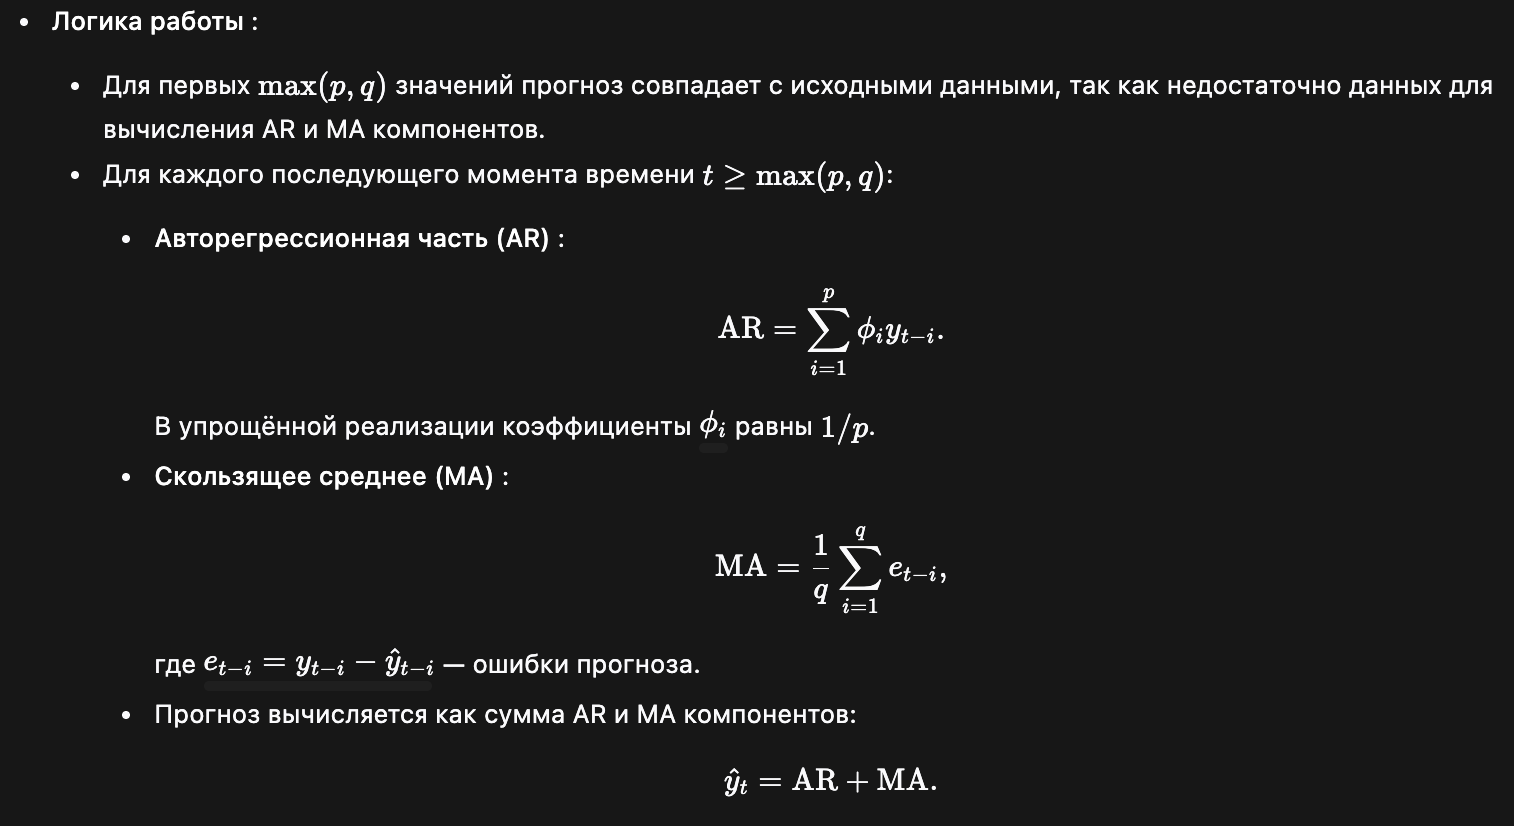

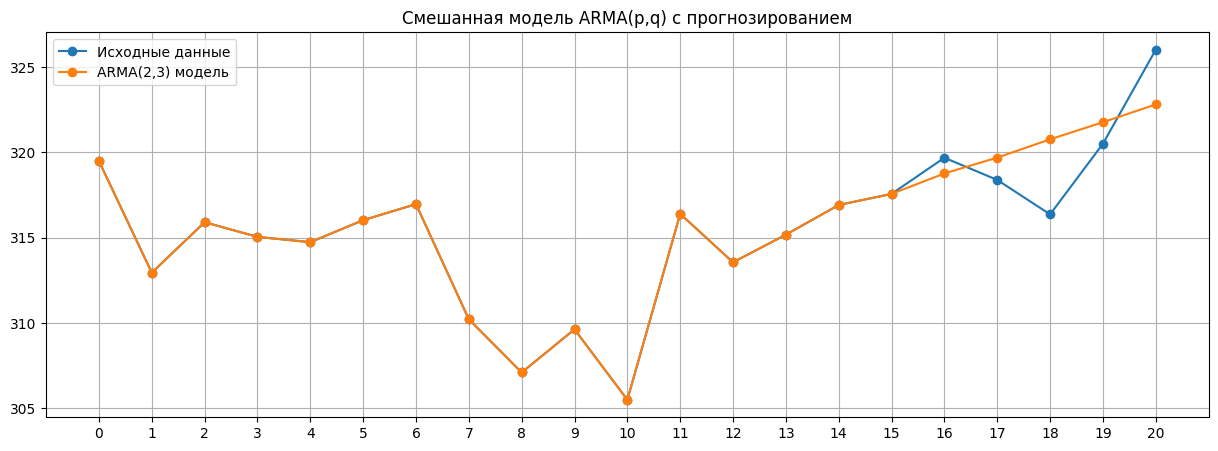

+--------------+-----------------+------------------+
| Номер строки | Исходные данные | ARMA(2,3) модель |
+--------------+-----------------+------------------+
|      0       |      319.5      |      319.5       |
|      1       |     312.95      |      312.95      |
|      2       |     315.91      |      315.91      |
|      3       |     315.05      |      315.05      |
|      4       |     314.74      |      314.74      |
|      5       |     316.03      |      316.03      |
|      6       |     316.97      |      316.97      |
|      7       |     310.22      |      310.22      |
|      8       |      307.1      |      307.1       |
|      9       |     309.63      |      309.63      |
|      10      |      305.5      |      305.5       |
|      11      |      316.4      |      316.4       |
|      12      |     313.56      |      313.56      |
|      13      |     315.18      |      315.18      |
|      14      |     316.92      |      316.92      |
|      15      |     317.57 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def arma_model_with_forecast(data, p, q, forecast_steps=3):
    """
    Смешанная модель ARMA(p, q) с оценкой коэффициентов и прогнозированием на несколько шагов вперед.

    :param data: Список наблюдений (временной ряд)
    :param p: Порядок авторегрессионной части (AR)
    :param q: Порядок скользящего среднего (MA)
    :param forecast_steps: Количество шагов для прогноза вперед
    :return: Список прогнозов (включая прогнозы на будущие шаги)
    """
    data = np.array(data)
    forecasts = []

    # Для первых max(p, q) значений прогноз равен исходным данным
    n_start = max(p, q)
    forecasts.extend(data[:n_start])

    # Вычисление прогнозов для существующих точек
    for t in range(n_start, len(data)):
        # Создание матрицы признаков для текущей точки
        X_ar = np.array([data[t - i] for i in range(1, p + 1)] if p > 0 else [])
        X_ma = np.array([data[t - i] - forecasts[t - i] for i in range(1, q + 1)] if q > 0 else [])
        X = np.concatenate([X_ar, X_ma]).reshape(1, -1)

        # Целевое значение для текущей точки
        y = data[t]

        # Оценка коэффициентов методом наименьших квадратов
        coefficients = np.linalg.lstsq(X.T @ X, X.T @ np.array([y]), rcond=None)[0].flatten()

        # Вычисление прогноза
        ar_component = np.sum(coefficients[:p] * X_ar) if p > 0 else 0
        ma_component = np.sum(coefficients[p:] * X_ma) if q > 0 else 0
        forecast = ar_component + ma_component
        forecasts.append(forecast)

    # Прогнозирование на будущие шаги
    for step in range(forecast_steps):
        # Создание матрицы признаков для прогноза
        X_ar = np.array([forecasts[-i] for i in range(1, p + 1)] if p > 0 else [])
        X_ma = np.array([forecasts[-i] - forecasts[-i - 1] for i in range(1, q + 1)] if q > 0 else [])
        X = np.concatenate([X_ar, X_ma]).reshape(1, -1)

        # Прогноз на следующий шаг
        future_forecast = np.sum(coefficients[:p] * X_ar) if p > 0 else 0
        future_forecast += np.sum(coefficients[p:] * X_ma) if q > 0 else 0
        forecasts.append(future_forecast)

    return forecasts

# Пример использования
p = 2  # Порядок AR
q = 3  # Порядок MA
forecast_steps = 5  # Количество шагов для прогноза вперед
forecasts_arma = arma_model_with_forecast(data_main[:-forecast_steps], p, q, forecast_steps)

# Визуализация
data_arma_plot = {
    "Исходные данные": data_main,
    f"ARMA({p},{q}) модель": forecasts_arma
}

print_data('Смешанная модель ARMA(p,q) с прогнозированием', data_arma_plot, data_arma_plot)

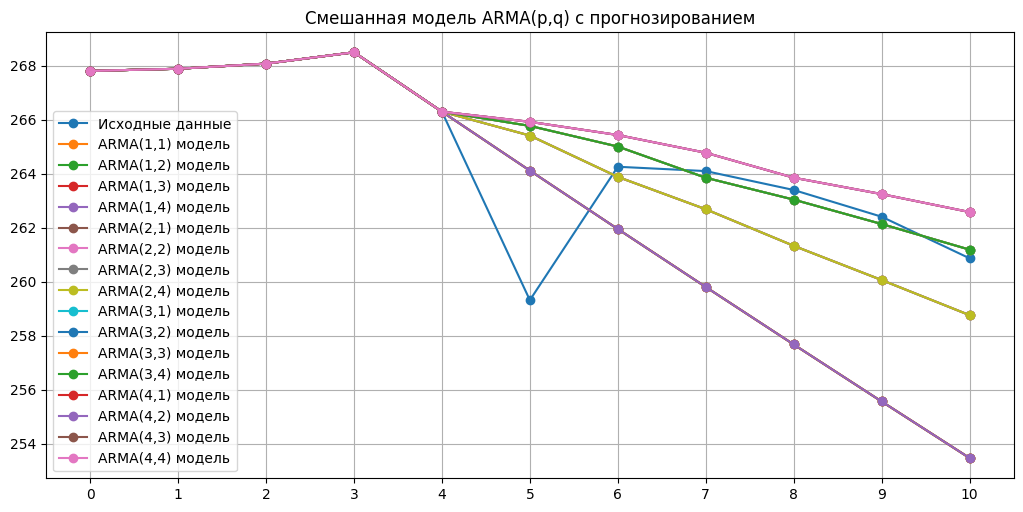

+--------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
| Номер строки | Исходные данные | ARMA(1,1) модель | ARMA(1,2) модель | ARMA(1,3) модель | ARMA(1,4) модель | ARMA(2,1) модель | ARMA(2,2) модель | ARMA(2,3) модель | ARMA(2,4) модель | ARMA(3,1) модель | ARMA(3,2) модель | ARMA(3,3) модель | ARMA(3,4) модель | ARMA(4,1) модель | ARMA(4,2) модель | ARMA(4,3) модель | ARMA(4,4) модель |
+--------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def arma_model_with_forecast(data, p, q, forecast_steps=3):
    """
    Смешанная модель ARMA(p, q) с оценкой коэффициентов и прогнозированием на несколько шагов вперед.

    :param data: Список наблюдений (временной ряд)
    :param p: Порядок авторегрессионной части (AR)
    :param q: Порядок скользящего среднего (MA)
    :param forecast_steps: Количество шагов для прогноза вперед
    :return: Список прогнозов (включая прогнозы на будущие шаги)
    """
    data = np.array(data)

    # Проверка минимального размера данных
    min_data_length = max(p, q) + forecast_steps
    if len(data) < min_data_length:
        raise ValueError(f"Входные данные должны содержать хотя бы {min_data_length} значений.")

    forecasts = []

    # Для первых max(p, q) значений прогноз равен исходным данным
    n_start = max(p, q)
    forecasts.extend(data[:n_start])

    # Последовательное вычисление прогнозов
    for t in range(n_start, len(data)):
        # Создание матрицы признаков для текущей точки
        X_ar = np.array([data[t - i] for i in range(1, p + 1)] if p > 0 else [])
        X_ma = np.array([data[t - i] - forecasts[t - i] for i in range(1, q + 1)] if q > 0 else [])
        X = np.concatenate([X_ar, X_ma]).reshape(1, -1)

        # Целевое значение для текущей точки
        y = data[t]

        # Оценка коэффициентов методом наименьших квадратов
        coefficients = np.linalg.lstsq(X.T @ X, X.T @ np.array([y]), rcond=None)[0].flatten()

        # Вычисление прогноза
        ar_component = np.sum(coefficients[:p] * X_ar) if p > 0 else 0
        ma_component = np.sum(coefficients[p:] * X_ma) if q > 0 else 0
        forecast = ar_component + ma_component
        forecasts.append(forecast)

    # Прогнозирование на будущие шаги
    for step in range(forecast_steps):
        # Создание матрицы признаков для прогноза
        X_ar = np.array([forecasts[-i] for i in range(1, p + 1)] if p > 0 else [])
        X_ma = np.array(
            [forecasts[-i] - forecasts[-i - 1] for i in range(1, q + 1)] if q > 0 and len(forecasts) >= q + 1 else []
        )
        X = np.concatenate([X_ar, X_ma]).reshape(1, -1)

        # Прогноз на следующий шаг
        future_forecast = np.sum(coefficients[:p] * X_ar) if p > 0 else 0
        future_forecast += np.sum(coefficients[p:] * X_ma) if q > 0 and len(forecasts) >= q + 1 else 0
        forecasts.append(future_forecast)

    return forecasts


forecast_steps = 6  # Количество шагов для прогноза вперед
data_arma_plot = {
        "Исходные данные": list(data_main[-forecast_steps-5:])
    }

for i in range(1,5):
  for j in range(1,5):

    p = i  # Порядок AR
    q = j  # Порядок MA
    forecasts_arma = arma_model_with_forecast(data_main[:-forecast_steps], p, q, forecast_steps)

    # Визуализация
    data_arma_plot[f"ARMA({p},{q}) модель"] = forecasts_arma[-forecast_steps-5:]

print_data('Смешанная модель ARMA(p,q) с прогнозированием', data_arma_plot, data_arma_plot)

Короче видимо надо пытаться делать ряд стационарным сначала

In [ ]:
from sklearn.metrics import mean_squared_error

train_size = int(len(data_main) * 0.8)
train, test = data_main[:train_size], data_main[train_size:]
forecasts = arma_model_with_forecast(train, p=2, q=3, forecast_steps=len(test))

rmse = np.sqrt(mean_squared_error(test, forecasts))
print(f"RMSE: {rmse}")

ValueError: Found input variables with inconsistent numbers of samples: [20, 100]

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Функция ARMA
def arma_model_with_forecast(data, p, q, forecast_steps=3):
    data = np.array(data)

    # Проверка минимального размера данных
    min_data_length = max(p, q)
    if len(data) < min_data_length:
        raise ValueError(f"Входные данные должны содержать хотя бы {min_data_length} значений.")

    forecasts = []

    # Для первых max(p, q) значений прогноз равен исходным данным
    n_start = max(p, q)
    forecasts.extend(data[:n_start])

    # Последовательное вычисление прогнозов
    for t in range(n_start, len(data)):
        # Создание матрицы признаков для текущей точки
        X_ar = np.array([data[t - i] for i in range(1, p + 1)] if p > 0 else [])
        X_ma = np.array([data[t - i] - forecasts[t - i] for i in range(1, q + 1)] if q > 0 else [])
        X = np.concatenate([X_ar, X_ma]).reshape(1, -1)

        # Целевое значение для текущей точки
        y = data[t]

        # Оценка коэффициентов методом наименьших квадратов
        coefficients = np.linalg.lstsq(X.T @ X, X.T @ np.array([y]), rcond=None)[0].flatten()

        # Вычисление прогноза
        ar_component = np.sum(coefficients[:p] * X_ar) if p > 0 else 0
        ma_component = np.sum(coefficients[p:] * X_ma) if q > 0 else 0
        forecast = ar_component + ma_component
        forecasts.append(forecast)

    # Прогнозирование на будущие шаги
    for step in range(forecast_steps):
        # Создание матрицы признаков для прогноза
        X_ar = np.array([forecasts[-i] for i in range(1, p + 1)] if p > 0 else [])
        X_ma = np.array(
            [forecasts[-i] - forecasts[-i - 1] for i in range(1, q + 1)] if q > 0 and len(forecasts) >= q + 1 else []
        )
        X = np.concatenate([X_ar, X_ma]).reshape(1, -1)

        # Прогноз на следующий шаг
        future_forecast = np.sum(coefficients[:p] * X_ar) if p > 0 else 0
        future_forecast += np.sum(coefficients[p:] * X_ma) if q > 0 and len(forecasts) >= q + 1 else 0
        forecasts.append(future_forecast)

    return forecasts

# Пример использования
p = 2  # Порядок AR
q = 3  # Порядок MA

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(data_main) * 0.8)
train, test = data_main[:train_size], data_main[train_size:]

# Прогнозирование
forecast_steps = len(test)
forecasts = arma_model_with_forecast(train, p=p, q=q, forecast_steps=forecast_steps)

# Оценка качества прогноза
rmse = np.sqrt(mean_squared_error(test, forecasts[:-len(test)]))
print(f"RMSE: {rmse}")

# Визуализация
plt.figure(figsize=(15, 5))
plt.plot(range(len(data_main)), data_main, label="Исходные данные", marker='o')
plt.plot(range(train_size, train_size + len(test)), forecasts, label="Прогноз", marker='x')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Прогноз временного ряда")
plt.grid()
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Оставляем место для легенды справа
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [20, 80]

### 5. Нестационарные модели авторегрессии и проинтегрированного скользящего среднего


#### 5.1. ARIMA(p,d,q) – Авторегрессионная интегрированная модель скользящего среднего

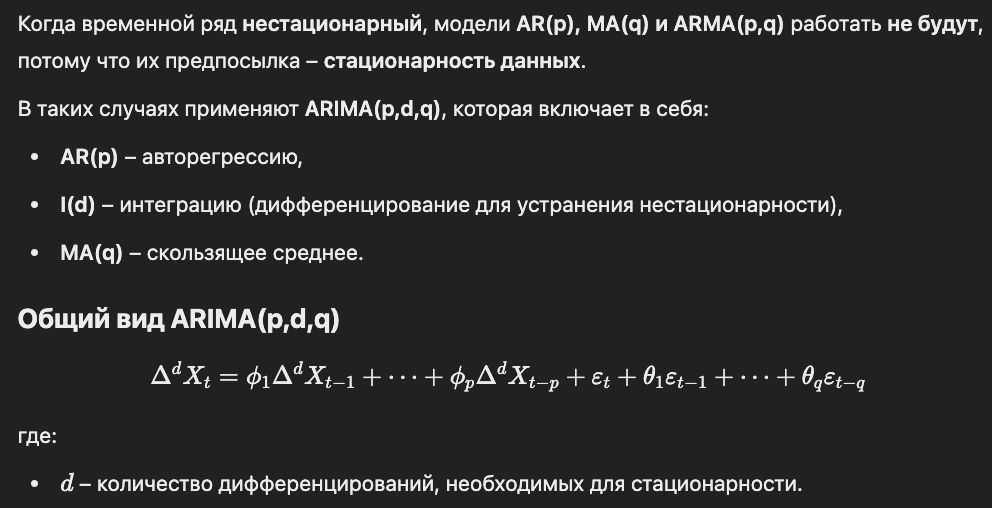

**Проверка на стационарность**

Перед построением модели ARIMA важно определить, стационарен ли ряд.

Критерии стационарности:
1. Визуальный анализ графика – если ряд явно имеет тренд, он нестационарен.
2. Тест Дики-Фуллера (ADF-тест) – проверяет наличие единичного корня (признак нестационарности).

In [ ]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt

# Генерация нестационарного ряда (случайное блуждание)
np.random.seed(42)
X = np.cumsum(np.random.randn(100))

# ADF-тест
adf_test = adfuller(X)

print("ADF-статистика:", adf_test[0])
print("p-значение:", adf_test[1])  # Если p < 0.05, ряд стационарный

# Визуализация временного ряда
plt.plot(X)
plt.title("Нестационарный временной ряд")
plt.show()


**Дифференцирование временного ряда**

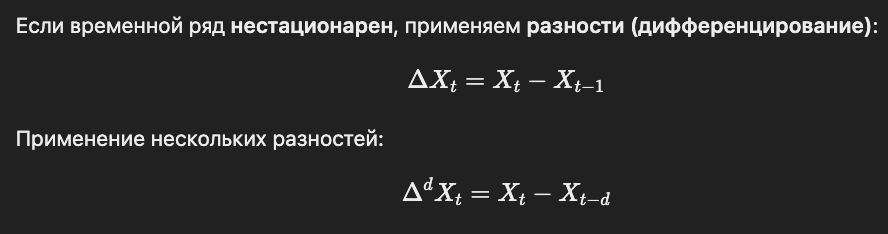

In [ ]:
# Первое дифференцирование
X_diff = np.diff(X)

# ADF-тест на дифференцированном ряде
adf_test_diff = adfuller(X_diff)

print("ADF-статистика (после дифференцирования):", adf_test_diff[0])
print("p-значение:", adf_test_diff[1])

# Визуализация после дифференцирования
plt.plot(X_diff)
plt.title("Стационарный временной ряд после 1-го дифференцирования")
plt.show()

После дифференцирования проверяем ADF-тест снова. Если p<0.05, ряд стационарный, и можем применять ARIMA(p,1,q).

**Выбор параметров ARIMA(p,d,q)**

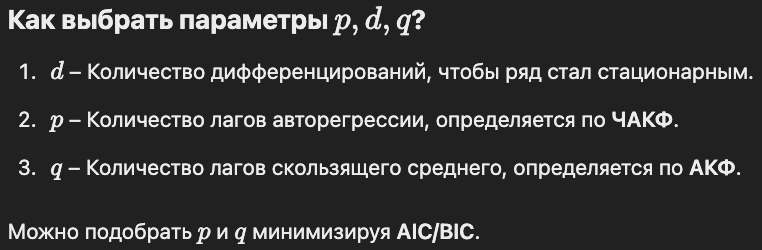

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Определяем ARIMA(2,1,2)
model = ARIMA(X, order=(2, 1, 2))
result = model.fit()

# Выводим параметры
print(result.summary())

# Прогнозируем на 10 шагов вперед
forecast = result.forecast(steps=10)
print("Прогноз:", forecast)

1)  Стационарный ряд - для арима (возможно для арма - проверить)]


2) для всех моделей написать общий метод для проверки адекватности
  1) случаность остатков 3.1
  2) нормальность остатков - Критерий пинсона Х^2
  3) отсутствие автокорреляции - Статистика Дарвина Уотсона - стр 44

3) написать модель ариму - пособие тиняковой (4.3)

4) для всех моделей из п2 написать алгоритм подбора параметров(альфа, бетта и тд) - минимум суммы квадратов остатков по модели

5) Проверить начальные условия - задавать их либо через уровнение регрессии, либо среднее по первым n


6) есть ряд из n
- берем 70% из него и находим оптимальные коэфф
- проверяем адекватность модели - неадикеватные не рассматриваем
- далее строим ответ модели
- проверяем точность модели
- берем следующие 20% строим прогноз по существующим коэфф
- проверям точность прогноза

-сравниваем модели по точности - выбираем лучшую.